In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

 

In [5]:
from IPython.display import Image
import pydotplus
import graphviz
from six import StringIO
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO

from pydot import graph_from_dot_data
from sklearn.utils import resample
from sklearn.tree import export_graphviz
import pydot
import random

%matplotlib inline

In [6]:
df = pd.read_csv('investments_VC.csv', encoding='latin1')
df

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.sample(10000)
df

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
49804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10620,/organization/cupp-computing,CUPP Computing,http://cuppcomputing.com,|Hardware + Software|,Hardware + Software,"2,00,000",operating,USA,NJ,Newark,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47873,/organization/woowa-bros,Woowa Bros,http://woowahan.com,|Software|,Software,"5,00,57,463",operating,KOR,NaN,Seoul,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8131,/organization/china-wi-max,China Wi Max,http://www.chinawi-max.com,|Mobile|,Mobile,"25,56,850",closed,USA,WI,Milwaukee,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26007,/organization/medivie-therapeutics,Medivie Therapeutics,http://medivie.com,|Dental|Medical Devices|Medical|Fitness|Health...,Health and Wellness,"8,70,000",operating,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1230,/organization/advanced-green-innovations,Advanced Green Innovations,http://agigreentech.com,|Clean Technology|,Clean Technology,"12,50,000",operating,USA,AZ,Phoenix,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1721,/organization/dart-therapeutics,Akashi Therapeutics,http://akashirx.com,|Biotechnology|,Biotechnology,"15,00,000",operating,USA,MA,Boston,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14496,/organization/expedit-us,Expedit.us,http://expedit.us,|Software|,Software,-,operating,USA,RI,Providence,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
49804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10620,/organization/cupp-computing,CUPP Computing,http://cuppcomputing.com,|Hardware + Software|,Hardware + Software,"2,00,000",operating,USA,NJ,Newark,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47873,/organization/woowa-bros,Woowa Bros,http://woowahan.com,|Software|,Software,"5,00,57,463",operating,KOR,NaN,Seoul,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8131,/organization/china-wi-max,China Wi Max,http://www.chinawi-max.com,|Mobile|,Mobile,"25,56,850",closed,USA,WI,Milwaukee,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.head().T

,49804,50357,10620,47873,8131
permalink,NaN,NaN,/organization/cupp-computing,/organization/woowa-bros,/organization/china-wi-max
name,NaN,NaN,CUPP Computing,Woowa Bros,China Wi Max
homepage_url,NaN,NaN,http://cuppcomputing.com,http://woowahan.com,http://www.chinawi-max.com
category_list,NaN,NaN,|Hardware + Software|,|Software|,|Mobile|
market,NaN,NaN,Hardware + Software,Software,Mobile
funding_total_usd,NaN,NaN,"2,00,000","5,00,57,463","25,56,850"
status,NaN,NaN,operating,operating,closed
country_code,NaN,NaN,USA,KOR,USA
state_code,NaN,NaN,NJ,NaN,WI
region,NaN,NaN,Newark,Seoul,Milwaukee


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 49804 to 52707
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             9121 non-null   object 
 1   name                  9121 non-null   object 
 2   homepage_url          8469 non-null   object 
 3   category_list         8372 non-null   object 
 4    market               8371 non-null   object 
 5    funding_total_usd    9121 non-null   object 
 6   status                8873 non-null   object 
 7   country_code          8155 non-null   object 
 8   state_code            5524 non-null   object 
 9   region                8155 non-null   object 
 10  city                  7983 non-null   object 
 11  funding_rounds        9121 non-null   float64
 12  founded_at            7158 non-null   object 
 13  founded_month         7146 non-null   object 
 14  founded_quarter       7146 non-null   object 
 15  founded_year        

In [11]:
df.shape

(10000, 39)

In [12]:
df.columns 

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

# Cleaning Data

In [13]:
# some of the columns have space in front. Removing spaces from the front.
df = df.rename(columns={' market ': "market", ' funding_total_usd ': "funding_total_usd"})

# the funding total column is read as a object so clearning it up so that we can use it as a numerical column
df['funding_total_usd']=df['funding_total_usd'].str.replace(',','') # removing commas from funding_total_usd column
df['funding_total_usd']=df['funding_total_usd'].str.replace(' ','')#removing extra space from funding_total_usd column
df['funding_total_usd']=df['funding_total_usd'].str.replace('-','0') #removing - from funding_total_usd column and replacing with 0


df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'])# turning column to number


#turning all date columns in to date
df['founded_at'] =  pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors = 'coerce') # conveting column into date and ignoring errors
df['first_funding_at'] =  pd.to_datetime(df['first_funding_at'], format='%Y-%m-%d', errors = 'coerce')  # conveting column into date and ignoring errors
df['last_funding_at'] =  pd.to_datetime(df['last_funding_at'], format='%Y-%m-%d', errors = 'coerce')  # conveting column into date and ignoring errors
df['founded_year'] =  pd.to_datetime(df['founded_year'], format='%Y', errors = 'coerce') # conveting column into date and ignoring errors
df['founded_month'] =  pd.to_datetime(df['founded_month'], format='%Y-%m', errors = 'coerce') # conveting column into date and ignoring errors
df.market = df.market.str.strip() #removing space from beginnning and end of market column

# Analysis

In [14]:
df.isin([0]).sum() 

permalink                  0
name                       0
homepage_url               0
category_list              0
market                     0
funding_total_usd       1549
status                     0
country_code               0
state_code                 0
region                     0
city                       0
funding_rounds             0
founded_at                 0
founded_month              0
founded_quarter            0
founded_year               0
first_funding_at           0
last_funding_at            0
seed                    6515
venture                 4876
equity_crowdfunding     9025
undisclosed             8936
convertible_note        9017
debt_financing          8332
angel                   8549
grant                   8914
private_equity          8878
post_ipo_equity         9063
post_ipo_debt           9109
secondary_market        9118
product_crowdfunding    9083
round_A                 7408
round_B                 8135
round_C                 8587
round_D       

In [15]:
df.count()

permalink               9121
name                    9121
homepage_url            8469
category_list           8372
market                  8371
funding_total_usd       9121
status                  8873
country_code            8155
state_code              5524
region                  8155
city                    7983
funding_rounds          9121
founded_at              7157
founded_month           7146
founded_quarter         7146
founded_year            7146
first_funding_at        9121
last_funding_at         9121
seed                    9121
venture                 9121
equity_crowdfunding     9121
undisclosed             9121
convertible_note        9121
debt_financing          9121
angel                   9121
grant                   9121
private_equity          9121
post_ipo_equity         9121
post_ipo_debt           9121
secondary_market        9121
product_crowdfunding    9121
round_A                 9121
round_B                 9121
round_C                 9121
round_D       

In [16]:
df.nunique()

permalink               9121
name                    9116
homepage_url            8469
category_list           3569
market                   550
funding_total_usd       3440
status                     3
country_code              84
state_code                59
region                   627
city                    1668
funding_rounds            13
founded_at              1319
founded_month            266
founded_quarter          134
founded_year              63
first_funding_at        2542
last_funding_at         2290
seed                     824
venture                 2227
equity_crowdfunding       80
undisclosed              159
convertible_note          83
debt_financing           455
angel                    260
grant                    149
private_equity           185
post_ipo_equity           55
post_ipo_debt             11
secondary_market           4
product_crowdfunding      34
round_A                  553
round_B                  370
round_C                  231
round_D       

In [17]:
(df.isin([0]).sum()/df.count()) *100

permalink                 0.000000
name                      0.000000
homepage_url              0.000000
category_list             0.000000
market                    0.000000
funding_total_usd        16.982787
status                    0.000000
country_code              0.000000
state_code                0.000000
region                    0.000000
city                      0.000000
funding_rounds            0.000000
founded_at                0.000000
founded_month             0.000000
founded_quarter           0.000000
founded_year              0.000000
first_funding_at          0.000000
last_funding_at           0.000000
seed                     71.428571
venture                  53.459051
equity_crowdfunding      98.947484
undisclosed              97.971714
convertible_note         98.859774
debt_financing           91.349633
angel                    93.728758
grant                    97.730512
private_equity           97.335818
post_ipo_equity          99.364105
post_ipo_debt       

In [18]:
df['status'].unique() 

array([nan, 'operating', 'closed', 'acquired'], dtype=object)

In [19]:
df.groupby('status')['name'].nunique()

status
acquired      652
closed        479
operating    7738
Name: name, dtype: int64

In [20]:
df['country_code'].nunique()

84

In [21]:
df['country_code'].unique()

array([nan, 'USA', 'KOR', 'GBR', 'AUS', 'IND', 'ROM', 'CAN', 'CHE', 'POL',
       'ESP', 'SGP', 'NLD', 'DEU', 'CHN', 'ARG', 'NOR', 'CZE', 'SWE',
       'CRI', 'BEL', 'HKG', 'ISR', 'ITA', 'FRA', 'IRL', 'AUT', 'LVA',
       'ZAF', 'FIN', 'IDN', 'RUS', 'DNK', 'MEX', 'TUN', 'MYS', 'KEN',
       'JPN', 'PHL', 'ISL', 'UKR', 'BGR', 'BRA', 'LTU', 'ARE', 'NZL',
       'CHL', 'SLV', 'GTM', 'COL', 'MMR', 'DZA', 'SVN', 'EST', 'VNM',
       'BLR', 'PER', 'TUR', 'PRT', 'BHS', 'TWN', 'HUN', 'KHM', 'JOR',
       'LUX', 'UGA', 'URY', 'THA', 'JEY', 'SRB', 'GRC', 'MKD', 'EGY',
       'BHR', 'LBN', 'GHA', 'PAK', 'SVK', 'CYM', 'BMU', 'BGD', 'NGA',
       'PAN', 'MLT', 'HRV'], dtype=object)

In [22]:
df.groupby('country_code')['name'].nunique().sort_values(ascending=False).head(50)

country_code
USA    5268
GBR     509
CAN     258
CHN     229
DEU     186
FRA     163
IND     152
ISR     130
ESP     107
RUS      71
SGP      65
SWE      57
AUS      57
CHL      53
JPN      53
BRA      52
KOR      51
NLD      51
ITA      50
IRL      48
DNK      41
CHE      40
FIN      39
BEL      38
AUT      27
HKG      26
ARG      22
TUR      21
NOR      20
MEX      20
POL      20
BGR      13
ARE      12
NZL      11
CZE      10
IDN      10
PRT      10
UKR      10
MYS       9
PER       9
ZAF       8
HUN       8
GRC       7
THA       7
EST       7
KEN       6
LUX       6
PHL       6
DZA       5
LTU       5
Name: name, dtype: int64

In [23]:
df.isnull().sum() 

permalink                879
name                     879
homepage_url            1531
category_list           1628
market                  1629
funding_total_usd        879
status                  1127
country_code            1845
state_code              4476
region                  1845
city                    2017
funding_rounds           879
founded_at              2843
founded_month           2854
founded_quarter         2854
founded_year            2854
first_funding_at         879
last_funding_at          879
seed                     879
venture                  879
equity_crowdfunding      879
undisclosed              879
convertible_note         879
debt_financing           879
angel                    879
grant                    879
private_equity           879
post_ipo_equity          879
post_ipo_debt            879
secondary_market         879
product_crowdfunding     879
round_A                  879
round_B                  879
round_C                  879
round_D       

In [24]:
df.isnull().sum()/df.count() *100

permalink                9.637101
name                     9.637101
homepage_url            18.077695
category_list           19.445772
market                  19.460041
funding_total_usd        9.637101
status                  12.701454
country_code            22.624157
state_code              81.028240
region                  22.624157
city                    25.266191
funding_rounds           9.637101
founded_at              39.723348
founded_month           39.938427
founded_quarter         39.938427
founded_year            39.938427
first_funding_at         9.637101
last_funding_at          9.637101
seed                     9.637101
venture                  9.637101
equity_crowdfunding      9.637101
undisclosed              9.637101
convertible_note         9.637101
debt_financing           9.637101
angel                    9.637101
grant                    9.637101
private_equity           9.637101
post_ipo_equity          9.637101
post_ipo_debt            9.637101
secondary_mark

In [25]:
df.groupby('status')['funding_total_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,652.0,1.660616e+07,3.857839e+07,0.0,1000000.0,5287000.0,18137500.0,6.408000e+08
closed,479.0,9.263206e+06,7.345529e+07,0.0,29416.5,530000.0,4000000.0,1.567504e+09
operating,7742.0,1.165437e+07,4.962698e+07,0.0,50000.0,1000000.0,6000000.0,1.498515e+09


In [26]:
df.groupby('status')['funding_rounds'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,652.0,1.970859,1.449851,1.0,1.0,1.0,2.0,9.0
closed,479.0,1.400835,0.909089,1.0,1.0,1.0,1.0,8.0
operating,7742.0,1.698786,1.329248,1.0,1.0,1.0,2.0,13.0


In [27]:
df.groupby('status')[['funding_rounds', 'funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']].mean().T #mean values of all columns and transposing it. Grouping by company status

status,acquired,closed,operating
funding_rounds,1.970859e+00,1.400835e+00,1.698786e+00
funding_total_usd,1.660616e+07,9.263206e+06,1.165437e+07
seed,1.701208e+05,1.330953e+05,2.408946e+05
venture,1.319573e+07,6.101103e+06,6.980893e+06
equity_crowdfunding,0.000000e+00,0.000000e+00,4.899631e+03
undisclosed,1.348961e+05,1.011814e+03,1.233126e+05
convertible_note,1.886503e+03,3.163825e+03,6.185722e+04
debt_financing,1.650182e+06,2.025895e+06,8.349806e+05
angel,7.519916e+04,4.624462e+04,6.607441e+04
grant,2.254601e+03,6.829580e+04,2.195988e+05


In [28]:
df.groupby('status')[['funding_rounds', 'funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']].median().T #mean values of all columns and transposing it. Grouping by company status

status,acquired,closed,operating
funding_rounds,1.0,1.0,1.0
funding_total_usd,5287000.0,530000.0,1000000.0
seed,0.0,0.0,0.0
venture,4866703.5,0.0,0.0
equity_crowdfunding,0.0,0.0,0.0
undisclosed,0.0,0.0,0.0
convertible_note,0.0,0.0,0.0
debt_financing,0.0,0.0,0.0
angel,0.0,0.0,0.0
grant,0.0,0.0,0.0


In [29]:
df.groupby('status')[['funding_rounds', 'funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']].sum().T #mean values of all columns and transposing it. Grouping by company status

status,acquired,closed,operating
funding_rounds,1.285000e+03,6.710000e+02,1.315200e+04
funding_total_usd,1.082722e+10,4.437076e+09,9.022813e+10
seed,1.109188e+08,6.375263e+07,1.865006e+09
venture,8.603617e+09,2.922429e+09,5.404608e+10
equity_crowdfunding,0.000000e+00,0.000000e+00,3.793295e+07
undisclosed,8.795224e+07,4.846590e+05,9.546858e+08
convertible_note,1.230000e+06,1.515472e+06,4.788986e+08
debt_financing,1.075919e+09,9.704035e+08,6.464420e+09
angel,4.902985e+07,2.215118e+07,5.115481e+08
grant,1.470000e+06,3.271369e+07,1.700134e+09


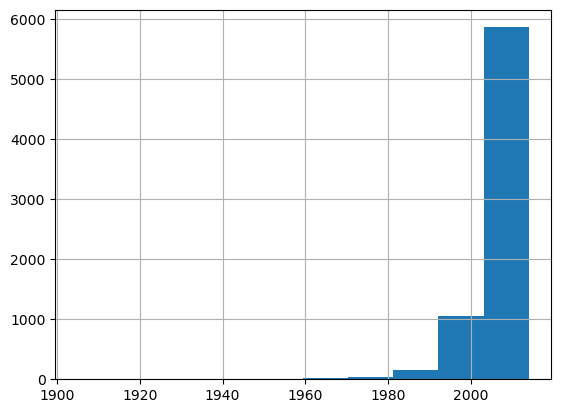

In [30]:
df['founded_year'].hist()
plt.show()

In [31]:
df['founded_year'].max()

Timestamp('2014-01-01 00:00:00')

In [32]:
df['founded_year'].min()

Timestamp('1905-01-01 00:00:00')

In [33]:
df['market'].nunique()

550

In [34]:
df.groupby('market')['funding_total_usd'].sum().sort_values(ascending = False).head(5)

market
Biotechnology       1.241016e+10
Software            8.268793e+09
Clean Technology    5.917733e+09
Health Care         5.247115e+09
Mobile              4.021547e+09
Name: funding_total_usd, dtype: float64

In [35]:
df.groupby('market')['name'].count().sort_values(ascending = False).head(5) 

market
Software         876
Biotechnology    649
Mobile           334
E-Commerce       329
Curated Web      292
Name: name, dtype: int64

In [36]:
df.groupby(df['market'])['permalink'].count().sort_values(ascending = False).head(5)

market
Software         876
Biotechnology    649
Mobile           334
E-Commerce       329
Curated Web      292
Name: permalink, dtype: int64

In [37]:
df['region'].unique()

array([nan, 'Newark', 'Seoul', 'Milwaukee', 'New York City',
       'Portland, Maine', 'London', 'Chicago', 'Los Angeles', 'Las Vegas',
       'Long Island', 'Sydney', 'SF Bay Area', 'Bhubaneswar', 'Austin',
       'Akron - Canton', 'Boston', 'Cluj-Napoca', 'San Diego',
       'Pittsburgh', 'Raleigh', 'Vancouver', 'Zurich', 'Warsaw',
       'Minneapolis', 'Salt Lake City', 'Santa Barbara', 'Denver',
       'Madrid', 'Singapore', 'AR - Other', 'Cleveland', 'Utrecht',
       'Berlin', 'Montreal', 'Zhuhai', 'Youngstown', 'Buenos Aires',
       'CHN - Other', 'Worcester', "Florida's Space Coast", 'Aust-Agder',
       'AB - Other', 'Chengdu', 'Albuquerque', 'Ottawa',
       'Washington, D.C.', 'KY - Other', 'Oklahoma City', 'CZE - Other',
       'Toronto', 'Providence', 'Omaha', 'Barcelona', 'Dallas', 'Seattle',
       'Gothenburg', 'Green Bay', 'Columbus, Ohio', 'Jacksonville',
       'New Delhi', 'Costa Rica', 'BEL - Other', 'Fayetteville',
       'Ontario - Inland Empire', 'Hong Kong', '

In [38]:
df.groupby('region')['name'].count().sort_values(ascending = False).head(10)

region
SF Bay Area         1219
New York City        481
Boston               344
London               305
Los Angeles          257
Seattle              157
Washington, D.C.     146
Chicago              139
San Diego            132
Austin               122
Name: name, dtype: int64

# Featured Engineering

In [39]:
df['diff_funding'] = df['last_funding_at'] - df['first_funding_at']

In [40]:
df['diff_funding'].describe()

count                           9121
mean     312 days 00:26:59.822387896
std      651 days 15:24:18.105561968
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                358 days 00:00:00
max              17287 days 00:00:00
Name: diff_funding, dtype: object

In [41]:
df['diff_funding_months'] = (df['last_funding_at'] - df['first_funding_at'])/np.timedelta64(1, 'm')

In [42]:
df['diff_funding_months'].describe()

count    9.121000e+03
mean     4.493070e+05
std      9.383643e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.155200e+05
max      2.489328e+07
Name: diff_funding_months, dtype: float64

In [43]:
df['total_investment'] = df['seed'] + df['venture'] + df['equity_crowdfunding'] + df['undisclosed'] + df['convertible_note'] + df['debt_financing'] + df['angel'] + df['grant'] + df['private_equity'] + df['post_ipo_equity'] + df['post_ipo_debt'] + df['secondary_market'] + df['product_crowdfunding']
#creating new column for total investment
df['total_investment'].describe()

count    9.121000e+03
mean     1.179052e+07
std      4.999487e+07
min      0.000000e+00
25%      5.324800e+04
50%      1.000000e+06
75%      6.678569e+06
max      1.567504e+09
Name: total_investment, dtype: float64

In [44]:
df['total_investment'].sum()

107541297720.0

In [45]:
df['funding_total_usd'].describe()

count    9.121000e+03
mean     1.179052e+07
std      4.999487e+07
min      0.000000e+00
25%      5.324800e+04
50%      1.000000e+06
75%      6.678569e+06
max      1.567504e+09
Name: funding_total_usd, dtype: float64

In [46]:
df['funding_total_usd'].sum()

107541297720.0

In [47]:
df['diff_first_funding_months'] = (df['first_funding_at'] - df['founded_at'])/np.timedelta64(1, 'm') 

In [48]:
df['diff_first_funding_months'].describe() 

count    7.157000e+03
mean     1.951571e+06
std      4.583526e+06
min     -6.649920e+06
25%      2.203200e+05
50%      7.704000e+05
75%      2.102400e+06
max      9.667440e+07
Name: diff_first_funding_months, dtype: float64

In [49]:
df1 = df.copy()

In [50]:
df1 = df1.drop(columns= ['homepage_url', 'category_list', 'state_code', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 
                    'diff_first_funding_months', 'diff_funding', 'funding_total_usd', 'city', 'region', 'first_funding_at', 'last_funding_at'])

In [51]:
df1 = df1.dropna(subset=['permalink', 'status', 'name', 'market', 'country_code', 'diff_funding_months']) 

In [52]:
df1.isnull().sum()

permalink               0
name                    0
market                  0
status                  0
country_code            0
funding_rounds          0
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity          0
post_ipo_equity         0
post_ipo_debt           0
secondary_market        0
product_crowdfunding    0
round_A                 0
round_B                 0
round_C                 0
round_D                 0
round_E                 0
round_F                 0
round_G                 0
round_H                 0
diff_funding_months     0
total_investment        0
dtype: int64

In [53]:
df1.shape

(7446, 29)

In [54]:
df1['diff_funding_year'] = round(df1['diff_funding_months']/12) # making new column that has difference in funding in year

In [55]:
df1.groupby(df1['diff_funding_year'])['permalink'].count().sort_values(ascending = False).head(50)

diff_funding_year
0.0         4614
43800.0       19
18360.0       12
11040.0        9
54720.0        9
105720.0       9
51240.0        8
14400.0        7
69840.0        7
87720.0        7
34440.0        7
154680.0       7
91320.0        7
62880.0        7
52080.0        7
29280.0        6
14640.0        6
43920.0        6
45360.0        6
69360.0        6
51000.0        6
130800.0       6
25560.0        6
60840.0        6
58560.0        6
76800.0        6
41160.0        6
40080.0        6
36480.0        6
120.0          6
22080.0        5
87600.0        5
95520.0        5
27000.0        5
36360.0        5
21960.0        5
59640.0        5
37920.0        5
65880.0        5
27720.0        5
20640.0        5
25440.0        5
131520.0       5
54840.0        5
55440.0        5
55560.0        5
40200.0        5
50520.0        5
47640.0        5
82800.0        5
Name: permalink, dtype: int64

In [56]:
print(df1['market'].nunique()) # number of unique market values
print(df1['country_code'].nunique()) 

516
81


In [57]:
admin_services = str('Employer Benefits Programs, Human Resource Automation, Corporate IT, Distribution, Service Providers, Archiving Service, Call Center, Collection Agency, College Recruiting, Courier Service, Debt Collections, Delivery, Document Preparation, Employee Benefits, Extermination Service, Facilities Support Services, Housekeeping Service, Human Resources, Knowledge Management, Office Administration, Packaging Services, Physical Security, Project Management, Staffing Agency, Trade Shows, Virtual Workforce').split(', ')
advertising = str('Creative Industries, Promotional, Advertising Ad Exchange, Ad Network, Ad Retargeting, Ad Server, Ad Targeting, Advertising, Advertising Platforms, Affiliate Marketing, Local Advertising, Mobile Advertising, Outdoor Advertising, SEM, Social Media Advertising, Video Advertising').split(', ')
agriculture = str('Agriculture, AgTech, Animal Feed, Aquaculture, Equestrian, Farming, Forestry, Horticulture, Hydroponics, Livestock').split(', ')
app = str('Application Performance Monitoring, App Stores, Application Platforms, Enterprise Application, App Discovery, Apps, Consumer Applications, Enterprise Applications, Mobile Apps, Reading Apps, Web Apps').split(', ')
artificial_intelli = str('Artificial Intelligence, Intelligent Systems, Machine Learning, Natural Language Processing, Predictive Analytics').split(', ')
biotechnology = str('Synthetic Biology, Bio-Pharm, Bioinformatics, Biometrics, Biopharma, Biotechnology, Genetics, Life Science, Neuroscience, Quantified Self').split(', ')
clothing = str('Fashion, Laundry and Dry-cleaning, Lingerie, Shoes').split(', ')
shopping = str('Consumer Behavior, Customer Support Tools, Discounts, Reviews and Recommendations, Auctions, Classifieds, Collectibles, Consumer Reviews, Coupons, E-Commerce, E-Commerce Platforms, Flash Sale, Gift, Gift Card, Gift Exchange, Gift Registry, Group Buying, Local Shopping, Made to Order, Marketplace, Online Auctions, Personalization, Point of Sale, Price Comparison, Rental, Retail, Retail Technology, Shopping, Shopping Mall, Social Shopping, Sporting Goods, Vending and Concessions, Virtual Goods, Wholesale').split(', ')
community = str("Self Development, Sex, Forums, Match-Making, Babies, Identity, Women, Kids, Entrepreneur, Networking, Adult, Baby, Cannabis, Children, Communities, Dating, Elderly, Family, Funerals, Humanitarian, Leisure, LGBT, Lifestyle, Men's, Online Forums, Parenting, Pet, Private Social Networking, Professional Networking, Q&A, Religion, Retirement, Sex Industry, Sex Tech, Social, Social Entrepreneurship, Teenagers, Virtual World, Wedding, Women's, Young Adults").split(', ')
electronics  = str('Mac, iPod Touch, Tablets, iPad, iPhone, Computer, Consumer Electronics, Drones, Electronics, Google Glass, Mobile Devices, Nintendo, Playstation, Roku, Smart Home, Wearables, Windows Phone, Xbox').split(', ')
consumer_goods= str('Commodities, Sunglasses, Groceries, Batteries, Cars, Beauty, Comics, Consumer Goods, Cosmetics, DIY, Drones, Eyewear, Fast-Moving Consumer Goods, Flowers, Furniture, Green Consumer Goods, Handmade, Jewelry, Lingerie, Shoes, Tobacco, Toys').split(', ')
content = str('E-Books, MicroBlogging, Opinions, Blogging Platforms, Content Delivery Network, Content Discovery, Content Syndication, Creative Agency, DRM, EBooks, Journalism, News, Photo Editing, Photo Sharing, Photography, Printing, Publishing, Social Bookmarking, Video Editing, Video Streaming').split(', ')
data = str('Optimization, A/B Testing, Analytics, Application Performance Management, Artificial Intelligence, Big Data, Bioinformatics, Biometrics, Business Intelligence, Consumer Research, Data Integration, Data Mining, Data Visualization, Database, Facial Recognition, Geospatial, Image Recognition, Intelligent Systems, Location Based Services, Machine Learning, Market Research, Natural Language Processing, Predictive Analytics, Product Research, Quantified Self, Speech Recognition, Test and Measurement, Text Analytics, Usability Testing').split(', ')
design = str('Visualization, Graphics, Design, Designers, CAD, Consumer Research, Data Visualization, Fashion, Graphic Design, Human Computer Interaction, Industrial Design, Interior Design, Market Research, Mechanical Design, Product Design, Product Research, Usability Testing, UX Design, Web Design').split(', ')
education = str('Universities, College Campuses, University Students, High Schools, All Students, Colleges, Alumni, Charter Schools, College Recruiting, Continuing Education, Corporate Training, E-Learning, EdTech, Education, Edutainment, Higher Education, Language Learning, MOOC, Music Education, Personal Development, Primary Education, Secondary Education, Skill Assessment, STEM Education, Textbook, Training, Tutoring, Vocational Education').split(', ')
energy = str('Gas, Natural Gas Uses, Oil, Oil & Gas, Battery, Biofuel, Biomass Energy, Clean Energy, Electrical Distribution, Energy, Energy Efficiency, Energy Management, Energy Storage, Fossil Fuels, Fuel, Fuel Cell, Oil and Gas, Power Grid, Renewable Energy, Solar, Wind Energy').split(', ')
events = str('Concerts, Event Management, Event Promotion, Events, Nightclubs, Nightlife, Reservations, Ticketing, Wedding').split(', ')
financial = str('Debt Collecting, P2P Money Transfer, Investment Management, Trading, Accounting, Angel Investment, Asset Management, Auto Insurance, Banking, Bitcoin, Commercial Insurance, Commercial Lending, Consumer Lending, Credit, Credit Bureau, Credit Cards, Crowdfunding, Cryptocurrency, Debit Cards, Debt Collections, Finance, Financial Exchanges, Financial Services, FinTech, Fraud Detection, Funding Platform, Gift Card, Health Insurance, Hedge Funds, Impact Investing, Incubators, Insurance, InsurTech, Leasing, Lending, Life Insurance, Micro Lending, Mobile Payments, Payments, Personal Finance, Prediction Markets, Property Insurance, Real Estate Investment, Stock Exchanges, Trading Platform, Transaction Processing, Venture Capital, Virtual Currency, Wealth Management').split(', ')
food = str('Specialty Foods, Bakery, Brewing, Cannabis, Catering, Coffee, Confectionery, Cooking, Craft Beer, Dietary Supplements, Distillery, Farmers Market, Food and Beverage, Food Delivery, Food Processing, Food Trucks, Fruit, Grocery, Nutrition, Organic Food, Recipes, Restaurants, Seafood, Snack Food, Tea, Tobacco, Wine And Spirits, Winery').split(', ')
gaming = str('Game, Games, Casual Games, Console Games, Contests, Fantasy Sports, Gambling, Gamification, Gaming, MMO Games, Online Games, PC Games, Serious Games, Video Games').split(', ')
government = str('Polling, Governance, CivicTech, Government, GovTech, Law Enforcement, Military, National Security, Politics, Public Safety, Social Assistance').split(', ')
hardware= str('Cable, 3D, 3D Technology, Application Specific Integrated Circuit (ASIC), Augmented Reality, Cloud Infrastructure, Communication Hardware, Communications Infrastructure, Computer, Computer Vision, Consumer Electronics, Data Center, Data Center Automation, Data Storage, Drone Management, Drones, DSP, Electronic Design Automation (EDA), Electronics, Embedded Systems, Field-Programmable Gate Array (FPGA), Flash Storage, Google Glass, GPS, GPU, Hardware, Industrial Design, Laser, Lighting, Mechanical Design, Mobile Devices, Network Hardware, NFC, Nintendo, Optical Communication, Playstation, Private Cloud, Retail Technology, RFID, RISC, Robotics, Roku, Satellite Communication, Semiconductor, Sensor, Sex Tech, Telecommunications, Video Conferencing, Virtual Reality, Virtualization, Wearables, Windows Phone, Wireless, Xbox').split(', ')
health_care = str('Senior Health, Physicians, Electronic Health Records, Doctors, Healthcare Services, Diagnostics, Alternative Medicine, Assisted Living, Assistive Technology, Biopharma, Cannabis, Child Care, Clinical Trials, Cosmetic Surgery, Dental, Diabetes, Dietary Supplements, Elder Care, Electronic Health Record (EHR), Emergency Medicine, Employee Benefits, Fertility, First Aid, Funerals, Genetics, Health Care, Health Diagnostics, Home Health Care, Hospital, Medical, Medical Device, mHealth, Nursing and Residential Care, Nutraceutical, Nutrition, Outpatient Care, Personal Health, Pharmaceutical, Psychology, Rehabilitation, Therapeutics, Veterinary, Wellness').split(', ')
it = str('Distributors, Algorithms, ICT, M2M, Technology, Business Information Systems, CivicTech, Cloud Data Services, Cloud Management, Cloud Security, CMS, Contact Management, CRM, Cyber Security, Data Center, Data Center Automation, Data Integration, Data Mining, Data Visualization, Document Management, E-Signature, Email, GovTech, Identity Management, Information and Communications Technology (ICT), Information Services, Information Technology, Intrusion Detection, IT Infrastructure, IT Management, Management Information Systems, Messaging, Military, Network Security, Penetration Testing, Private Cloud, Reputation, Sales Automation, Scheduling, Social CRM, Spam Filtering, Technical Support, Unified Communications, Video Chat, Video Conferencing, Virtualization, VoIP').split(', ')
internet = str('Online Identity, Cyber, Portals, Web Presence Management, Domains, Tracking, Web Tools, Curated Web, Search, Cloud Computing, Cloud Data Services, Cloud Infrastructure, Cloud Management, Cloud Storage, Darknet, Domain Registrar, E-Commerce Platforms, Ediscovery, Email, Internet, Internet of Things, ISP, Location Based Services, Messaging, Music Streaming, Online Forums, Online Portals, Private Cloud, Product Search, Search Engine, SEM, Semantic Search, Semantic Web, SEO, SMS, Social Media, Social Media Management, Social Network, Unified Communications, Vertical Search, Video Chat, Video Conferencing, Visual Search, VoIP, Web Browsers, Web Hosting').split(', ')
invest = str('Angel Investment, Banking, Commercial Lending, Consumer Lending, Credit, Credit Cards, Financial Exchanges, Funding Platform, Hedge Funds, Impact Investing, Incubators, Micro Lending, Stock Exchanges, Trading Platform, Venture Capital').split(', ')
manufacturing = str('Innovation Engineering, Civil Engineers, Heavy Industry, Engineering Firms, Systems, 3D Printing, Advanced Materials, Foundries, Industrial, Industrial Automation, Industrial Engineering, Industrial Manufacturing, Machinery Manufacturing, Manufacturing, Paper Manufacturing, Plastics and Rubber Manufacturing, Textiles, Wood Processing').split(', ')
media = str('Writers, Creative, Television, Entertainment, Media, Advice, Animation, Art, Audio, Audiobooks, Blogging Platforms, Broadcasting, Celebrity, Concerts, Content, Content Creators, Content Discovery, Content Syndication, Creative Agency, Digital Entertainment, Digital Media, DRM, EBooks, Edutainment, Event Management, Event Promotion, Events, Film, Film Distribution, Film Production, Guides, In-Flight Entertainment, Independent Music, Internet Radio, Journalism, Media and Entertainment, Motion Capture, Music, Music Education, Music Label, Music Streaming, Music Venues, Musical Instruments, News, Nightclubs, Nightlife, Performing Arts, Photo Editing, Photo Sharing, Photography, Podcast, Printing, Publishing, Reservations, Social Media, Social News, Theatre, Ticketing, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming, Virtual World').split(', ')
message = str('Unifed Communications, Chat, Email, Meeting Software, Messaging, SMS, Unified Communications, Video Chat, Video Conferencing, VoIP, Wired Telecommunications').split(', ')
mobile = str('Android, Google Glass, iOS, mHealth, Mobile, Mobile Apps, Mobile Devices, Mobile Payments, Windows Phone, Wireless').split(', ')
music = str('Audio, Audiobooks, Independent Music, Internet Radio, Music, Music Education, Music Label, Music Streaming, Musical Instruments, Podcast').split(', ')
resource = str('Biofuel, Biomass Energy, Fossil Fuels, Mineral, Mining, Mining Technology, Natural Resources, Oil and Gas, Precious Metals, Solar, Timber, Water, Wind Energy').split(', ')
navigation = str('Maps, Geospatial, GPS, Indoor Positioning, Location Based Services, Mapping Services, Navigation').split(', ')
other = str('Mass Customization, Monetization, Testing, Subscription Businesses, Mobility, Incentives, Peer-to-Peer, Nonprofits, Alumni, Association, B2B, B2C, Blockchain, Charity, Collaboration, Collaborative Consumption, Commercial, Consumer, Crowdsourcing, Customer Service, Desktop Apps, Emerging Markets, Enterprise, Ethereum, Franchise, Freemium, Generation Y, Generation Z, Homeless Shelter, Infrastructure, Knowledge Management, LGBT Millennials, Non Profit, Peer to Peer, Professional Services, Project Management, Real Time, Retirement, Service Industry, Sharing Economy, Small and Medium Businesses, Social Bookmarking, Social Impact, Subscription Service, Technical Support, Underserved Children, Universities').split(', ')
payment = str('Billing, Bitcoin, Credit Cards, Cryptocurrency, Debit Cards, Fraud Detection, Mobile Payments, Payments, Transaction Processing, Virtual Currency').split(', ')
platforms = str('Development Platforms, Android, Facebook, Google, Google Glass, iOS, Linux, macOS, Nintendo, Operating Systems, Playstation, Roku, Tizen, Twitter, WebOS, Windows, Windows Phone, Xbox').split(', ')
privacy = str('Digital Rights Management, Personal Data, Cloud Security, Corrections Facilities, Cyber Security, DRM, E-Signature, Fraud Detection, Homeland Security, Identity Management, Intrusion Detection, Law Enforcement, Network Security, Penetration Testing, Physical Security, Privacy, Security').split(', ')
services = str('Funeral Industry, English-Speaking, Spas, Plumbers, Service Industries, Staffing Firms, Translation, Career Management, Business Services, Services, Accounting, Business Development, Career Planning, Compliance, Consulting, Customer Service, Employment, Environmental Consulting, Field Support, Freelance, Intellectual Property, Innovation Management, Legal, Legal Tech, Management Consulting, Outsourcing, Professional Networking, Quality Assurance, Recruiting, Risk Management, Social Recruiting, Translation Service').split(', ')
realestate= str('Office Space, Self Storage, Brokers, Storage, Home Owners, Self Storage , Realtors, Home & Garden, Utilities, Home Automation, Architecture, Building Maintenance, Building Material, Commercial Real Estate, Construction, Coworking, Facility Management, Fast-Moving Consumer Goods, Green Building, Home and Garden, Home Decor, Home Improvement, Home Renovation, Home Services, Interior Design, Janitorial Service, Landscaping, Property Development, Property Management, Real Estate, Real Estate Investment, Rental Property, Residential, Self-Storage, Smart Building, Smart Cities, Smart Home, Timeshare, Vacation Rental').split(', ')
sales = str('Advertising, Affiliate Marketing, App Discovery, App Marketing, Brand Marketing, Cause Marketing, Content Marketing, CRM, Digital Marketing, Digital Signage, Direct Marketing, Direct Sales, Email Marketing, Lead Generation, Lead Management, Local, Local Advertising, Local Business, Loyalty Programs, Marketing, Marketing Automation, Mobile Advertising, Multi-level Marketing, Outdoor Advertising, Personal Branding, Public Relations, Sales, Sales Automation, SEM, SEO, Social CRM, Social Media Advertising, Social Media Management, Social Media Marketing, Sponsorship, Video Advertising').split(', ')
science = str('Face Recognition, New Technologies, Advanced Materials, Aerospace, Artificial Intelligence, Bioinformatics, Biometrics, Biopharma, Biotechnology, Chemical, Chemical Engineering, Civil Engineering, Embedded Systems, Environmental Engineering, Human Computer Interaction, Industrial Automation, Industrial Engineering, Intelligent Systems, Laser, Life Science, Marine Technology, Mechanical Engineering, Nanotechnology, Neuroscience, Nuclear, Quantum Computing, Robotics, Semiconductor, Software Engineering, STEM Education').split(', ')
software = str('Business Productivity, 3D Technology, Android, App Discovery, Application Performance Management, Apps, Artificial Intelligence, Augmented Reality, Billing, Bitcoin, Browser Extensions, CAD, Cloud Computing, Cloud Management, CMS, Computer Vision, Consumer Applications, Consumer Software, Contact Management, CRM, Cryptocurrency, Data Center Automation, Data Integration, Data Storage, Data Visualization, Database, Developer APIs, Developer Platform, Developer Tools, Document Management, Drone Management, E-Learning, EdTech, Electronic Design Automation (EDA), Embedded Software, Embedded Systems, Enterprise Applications, Enterprise Resource Planning (ERP), Enterprise Software, Facial Recognition, File Sharing, IaaS, Image Recognition, iOS, Linux, Machine Learning, macOS, Marketing Automation, Meeting Software, Mobile Apps, Mobile Payments, MOOC, Natural Language Processing, Open Source, Operating Systems, PaaS, Predictive Analytics, Presentation Software, Presentations, Private Cloud, Productivity Tools, QR Codes, Reading Apps, Retail Technology, Robotics, SaaS, Sales Automation, Scheduling, Sex Tech, Simulation, SNS, Social CRM, Software, Software Engineering, Speech Recognition, Task Management, Text Analytics, Transaction Processing, Video Conferencing, Virtual Assistant, Virtual Currency, Virtual Desktop, Virtual Goods, Virtual Reality, Virtual World, Virtualization, Web Apps, Web Browsers, Web Development').split(', ')
sports = str('American Football, Baseball, Basketball, Boating, Cricket, Cycling, Diving, eSports, Fantasy Sports, Fitness, Golf, Hockey, Hunting, Outdoors, Racing, Recreation, Rugby, Sailing, Skiing, Soccer, Sporting Goods, Sports, Surfing, Swimming, Table Tennis, Tennis, Ultimate Frisbee, Volley Ball').split(', ')
sustainability = str('Green, Wind, Biomass Power Generation, Renewable Tech, Environmental Innovation, Renewable Energies, Clean Technology, Biofuel, Biomass Energy, Clean Energy, CleanTech, Energy Efficiency, Environmental Engineering, Green Building, Green Consumer Goods, GreenTech, Natural Resources, Organic, Pollution Control, Recycling, Renewable Energy, Solar, Sustainability, Waste Management, Water Purification, Wind Energy').split(', ')
transportation = str('Taxis, Air Transportation, Automotive, Autonomous Vehicles, Car Sharing, Courier Service, Delivery Service, Electric Vehicle, Ferry Service, Fleet Management, Food Delivery, Freight Service, Last Mile Transportation, Limousine Service, Logistics, Marine Transportation, Parking, Ports and Harbors, Procurement, Public Transportation, Railroad, Recreational Vehicles, Ride Sharing, Same Day Delivery, Shipping, Shipping Broker, Space Travel, Supply Chain Management, Taxi Service, Transportation, Warehousing, Water Transportation').split(', ')
travel = str('Adventure Travel, Amusement Park and Arcade, Business Travel, Casino, Hospitality, Hotel, Museums and Historical Sites, Parks, Resorts, Timeshare, Tour Operator, Tourism, Travel, Travel Accommodations, Travel Agency, Vacation Rental').split(', ')
video = str('Animation, Broadcasting, Film, Film Distribution, Film Production, Motion Capture, TV, TV Production, Video, Video Editing, Video on Demand, Video Streaming').split(', ')

In [58]:
import pandas as pd
import numpy as np
import re

# Sample lists for demonstration
admin_services = ['administrative services']
software = ['software']
advertising = ['advertising']
agriculture = ['agriculture']
app = ['apps']
artificial_intelli = ['artificial intelligence']
biotechnology = ['biotechnology']
clothing = ['clothing']
shopping = ['shopping']
community = ['community']
electronics = ['electronics']
consumer_goods = ['consumer goods']
content = ['content']
data = ['data']
design = ['design']
education = ['education']
energy = ['energy']
events = ['events']
financial = ['financial']
food = ['food']
gaming = ['gaming']
government = ['government']
hardware = ['hardware']
health_care = ['health care']
it = ['information technology']
internet = ['internet']
invest = ['investments']
manufacturing = ['manufacturing']
media = ['media']
message = ['messaging']
mobile = ['mobile']
music = ['music']
resource = ['natural resources']
navigation = ['navigation']
payment = ['payments']
platforms = ['platforms']
privacy = ['privacy']
services = ['services']
realestate = ['real estate']
sales = ['sales']
science = ['science']
sports = ['sports']
sustainability = ['sustainability']
transportation = ['transportation']
travel = ['travel']
video = ['video']
other = ['other']

# Create a dictionary of industries
industry_categories = {
    "Administrative Services": admin_services,
    "Software": software,
    "Advertising": advertising,
    "Agriculture and Farming": agriculture,
    "Apps": app,
    "Artificial Intelligence": artificial_intelli,
    "Biotechnology": biotechnology,
    "Clothing and Apparel": clothing,
    "Commerce and Shopping": shopping,
    "Community and Lifestyle": community,
    "Consumer Electronics": electronics,
    "Consumer Goods": consumer_goods,
    "Content and Publishing": content,
    "Data and Analytics": data,
    "Design": design,
    "Education": education,
    "Energy": energy,
    "Events": events,
    "Financial Services": financial,
    "Food and Beverage": food,
    "Gaming": gaming,
    "Government and Military": government,
    "Hardware": hardware,
    "Health Care": health_care,
    "Information Technology": it,
    "Internet Services": internet,
    "Lending and Investments": invest,
    "Manufacturing": manufacturing,
    "Media and Entertainment": media,
    "Messaging and Telecommunication": message,
    "Mobile": mobile,
    "Music and Audio": music,
    "Natural Resources": resource,
    "Navigation and Mapping": navigation,
    "Payments": payment,
    "Platforms": platforms,
    "Privacy and Security": privacy,
    "Professional Services": services,
    "Real Estate": realestate,
    "Sales and Marketing": sales,
    "Science and Engineering": science,
    "Sports": sports,
    "Sustainability": sustainability,
    "Transportation": transportation,
    "Travel and Tourism": travel,
    "Video": video,
    "Other": other
}

# Function to categorize the market
def categorize_industry(market):
    for industry, keywords in industry_categories.items():
        if pd.notnull(market) and re.search('|'.join(keywords), market, flags=re.IGNORECASE):
            return industry
    return "Other"  # Default if no category is found

# Assuming df1 is your DataFrame and 'market' is the column you want to categorize
df1['Industry_Group'] = df1['market'].apply(categorize_industry)


In [59]:
df1['Industry_Group'].unique()

array(['Software', 'Mobile', 'Travel and Tourism', 'Other',
       'Biotechnology', 'Advertising', 'Media and Entertainment',
       'Design', 'Consumer Electronics', 'Manufacturing', 'Video', 'Apps',
       'Transportation', 'Sports', 'Education', 'Professional Services',
       'Gaming', 'Data and Analytics', 'Health Care', 'Platforms',
       'Messaging and Telecommunication', 'Consumer Goods',
       'Internet Services', 'Food and Beverage', 'Content and Publishing',
       'Information Technology', 'Real Estate', 'Music and Audio',
       'Sales and Marketing', 'Science and Engineering', 'Payments',
       'Hardware', 'Government and Military', 'Events', 'Sustainability',
       'Agriculture and Farming', 'Financial Services',
       'Commerce and Shopping', 'Navigation and Mapping', 'Energy',
       'Artificial Intelligence', 'Privacy and Security',
       'Natural Resources'], dtype=object)

In [60]:
df1['Industry_Group'].nunique()

43

In [61]:
df1.groupby(by = ['Industry_Group'])['permalink'].count().sort_values(ascending = False)

Industry_Group
Other                              3517
Software                           1218
Biotechnology                       603
Mobile                              339
Health Care                         210
Media and Entertainment             200
Advertising                         179
Education                           156
Manufacturing                       129
Internet Services                    72
Travel and Tourism                   64
Real Estate                          63
Data and Analytics                   59
Messaging and Telecommunication      52
Video                                51
Apps                                 50
Professional Services                50
Transportation                       48
Music and Audio                      44
Sports                               40
Design                               32
Sales and Marketing                  25
Consumer Electronics                 24
Content and Publishing               24
Hardware                 

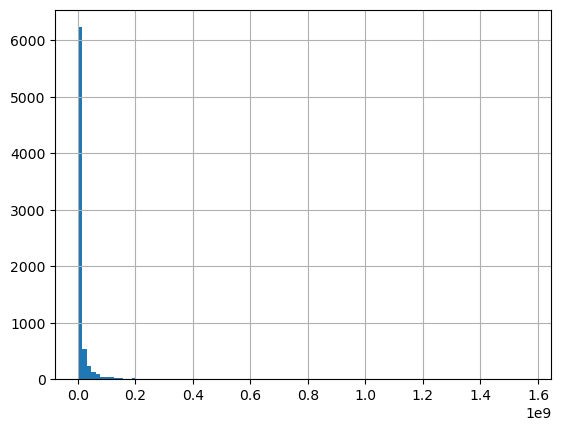

In [62]:
df1['total_investment'].hist(bins = 100)
plt.show()

In [63]:
country = pd.read_csv('country.csv') # uploading dataset to map countyr code to continent
country = country[['Continent_Name', 'Three_Letter_Country_Code', 'Country_Name']]
country = country.dropna(how='any',axis=0) 
country.isnull().sum()

Continent_Name               0
Three_Letter_Country_Code    0
Country_Name                 0
dtype: int64

In [64]:
df1 = df1.merge(country, left_on='country_code', right_on='Three_Letter_Country_Code')
# merging both datasets and creating new column called continent
df1.columns

Index(['permalink', 'name', 'market', 'status', 'country_code',
       'funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_months', 'total_investment', 'diff_funding_year',
       'Industry_Group', 'Continent_Name', 'Three_Letter_Country_Code',
       'Country_Name'],
      dtype='object')

In [65]:
df1.groupby(by = ['Continent_Name'])['permalink'].count()

Continent_Name
Africa             22
Asia              778
Europe           1432
North America    5100
Oceania            57
South America     108
Name: permalink, dtype: int64

In [66]:
df1.shape 

(7497, 34)

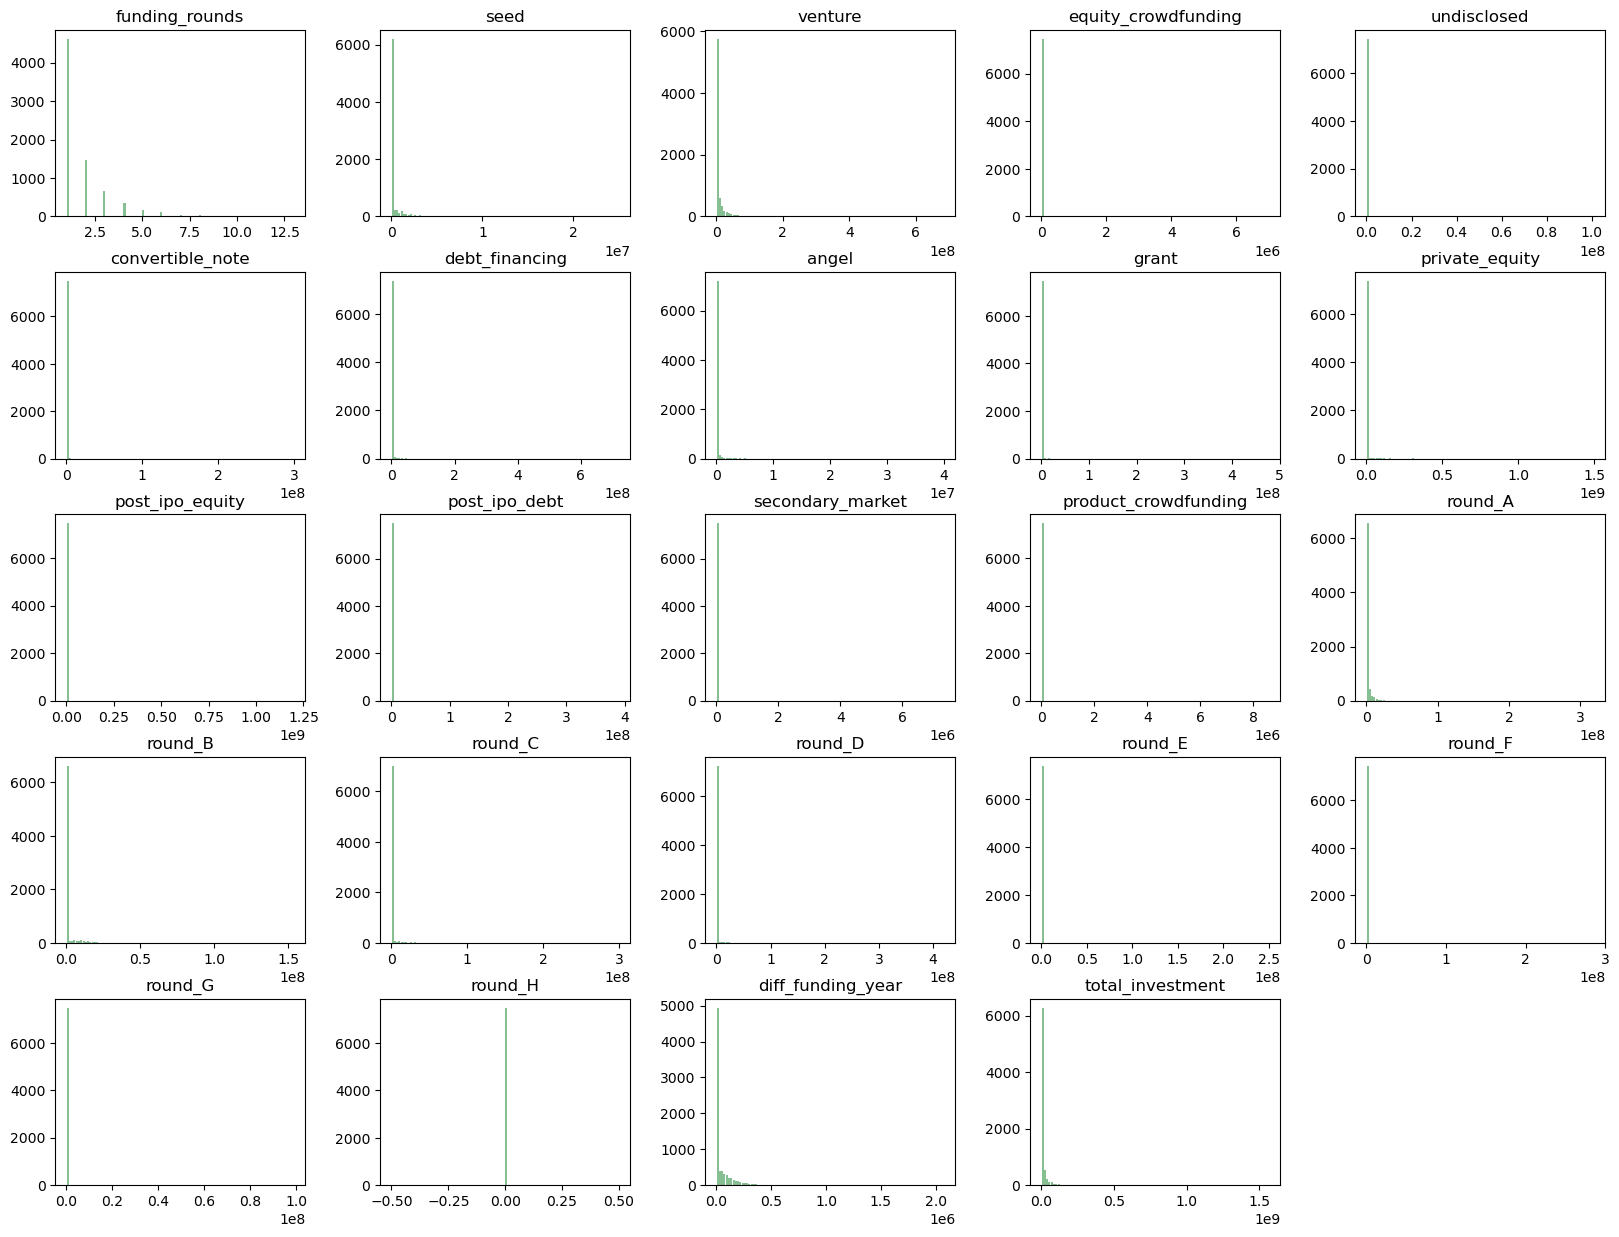

In [67]:
df1.hist(column=['funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_year', 'total_investment'], bins=100, grid=False, figsize=(20,15), color='#86bf91', zorder=2, rwidth=0.9) 
plt.show()
       # creating histogram of all numberical values, all values are very skewed

In [68]:
df1.isin([0]).sum()

permalink                       0
name                            0
market                          0
status                          0
country_code                    0
funding_rounds                  0
seed                         5377
venture                      3741
equity_crowdfunding          7415
undisclosed                  7356
convertible_note             7406
debt_financing               6777
angel                        7000
grant                        7344
private_equity               7287
post_ipo_equity              7454
post_ipo_debt                7487
secondary_market             7495
product_crowdfunding         7467
round_A                      5931
round_B                      6574
round_C                      6990
round_D                      7240
round_E                      7413
round_F                      7466
round_G                      7491
round_H                      7497
diff_funding_months          4648
total_investment             1111
diff_funding_y

In [69]:
df2 = df1.copy()

In [70]:
df2 = df2.drop(['Three_Letter_Country_Code', 'Country_Name', 'diff_funding_months', 'country_code', 'market'], axis=1) # dropping unnecessary columns

In [71]:
df2[['funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'diff_funding_year', 'total_investment']].describe().T

,count,mean,std,min,25%,50%,75%,max
funding_rounds,7497.0,1.792317e+00,1.395489e+00,1.0,1.0,1.0,2.0,1.300000e+01
seed,7497.0,2.472842e+05,7.734056e+05,0.0,0.0,0.0,40000.0,2.500000e+07
venture,7497.0,8.278439e+06,2.502678e+07,0.0,0.0,14000.0,6000000.0,6.851012e+08
equity_crowdfunding,7497.0,3.741205e+03,9.502215e+04,0.0,0.0,0.0,0.0,7.000000e+06
undisclosed,7497.0,1.131542e+05,2.282753e+06,0.0,0.0,0.0,0.0,1.010000e+08
convertible_note,7497.0,6.233036e+04,3.543663e+06,0.0,0.0,0.0,0.0,3.000000e+08
debt_financing,7497.0,1.021170e+06,1.598109e+07,0.0,0.0,0.0,0.0,7.216443e+08
angel,7497.0,7.274899e+04,6.977774e+05,0.0,0.0,0.0,0.0,4.000000e+07
grant,7497.0,2.030074e+05,7.468174e+06,0.0,0.0,0.0,0.0,4.774754e+08
private_equity,7497.0,2.347308e+06,3.070380e+07,0.0,0.0,0.0,0.0,1.498515e+09


In [72]:
#creating categories of these numerical values based on the output from the describe data. Also creating new column for the categories
cat_invest = pd.cut(df2.total_investment, bins = [-1, 112500, 1400300, 8205200, 40079503000], labels=['low','low_medium','high_medium','high'])
#labeling total investment values as low, low medium, high medium and high based on their descriptive summary. 
df2.insert(0,'cat_total_investment',cat_invest) # creating new column called cat_total_investment

In [73]:
cat_diff_funding_year = pd.cut(df2.diff_funding_year, bins = [-1, 2, 49], labels=['low','high'])
#labeling diff_funding_year as low and high based on their descriptive summary. 
df2.insert(0,'cat_diff_funding_year',cat_diff_funding_year)# creating new column called cat_diff_funding_year

In [74]:
cat_funding_rounds = pd.cut(df2.funding_rounds, bins = [-1, 2, 20], labels=['low','high'])
#labeling funding_rounds as low and high based on their descriptive summary. 
df2.insert(0,'cat_funding_rounds',cat_funding_rounds)# creating new column called cat_funding_rounds

In [75]:
cat_seed = pd.cut(df2.seed, bins = [-1, 28000, 140000000], labels=['low','high'])
#labeling seed as low and high  based on their descriptive summary. 
df2.insert(0,'cat_seed',cat_seed)# creating new column called cat_seed

In [76]:
cat_venture = pd.cut(df2.venture, bins = [-1, 85038.5, 6000000, 2451000000], labels=['low','medium','high'])
#labeling venture as low, medium and high based on their descriptive summary. 
df2.insert(0,'cat_venture',cat_venture) # creating new column called cat_venture

In [77]:
# fixing the categorical columns  into numerical values so that we can use it on the model
df2['cat_status'] = df2['status'].replace(['closed', 'operating', 'acquired'], [0, 1, 2])
df2['cat_total_investment'] = df2['cat_total_investment'].replace(['low','low_medium','high_medium','high'], [0, 1, 2, 3])
df2['cat_diff_funding_year'] = df2['cat_diff_funding_year'].replace(['low', 'high'], [0, 1])
df2['cat_funding_rounds'] = df2['cat_funding_rounds'].replace(['low', 'high'], [0, 1])
df2['cat_seed'] = df2['cat_seed'].replace(['low', 'high'], [0, 1])
df2['cat_venture'] = df2['cat_venture'].replace(['low','medium','high'], [0, 1, 3])

C:\Users\User\AppData\Local\Temp\ipykernel_17116\1724318791.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['cat_status'] = df2['status'].replace(['closed', 'operating', 'acquired'], [0, 1, 2])
C:\Users\User\AppData\Local\Temp\ipykernel_17116\1724318791.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['cat_total_investment'] = df2['cat_total_investment'].replace(['low','low_medium','high_medium','high'], [0, 1, 2, 3])
C:\Users\User\AppData\Local\Temp\ipykernel_17116\1724318791.py:3: FutureWarning: The behavior of Se

In [78]:
#as a lot of the money columns have 0, we are turning them into new categories of 0 and 1
df2.loc[df2['equity_crowdfunding'] < 1, 'cat_equity_crowdfunding'] = 0
df2.loc[df2['equity_crowdfunding'] > 1, 'cat_equity_crowdfunding'] = 1


df2.loc[df2['undisclosed'] < 1, 'cat_undisclosed'] = 0
df2.loc[df2['undisclosed'] > 1, 'cat_undisclosed'] = 1


df2.loc[df2['convertible_note'] < 1, 'cat_convertible_note'] = 0
df2.loc[df2['convertible_note'] > 1, 'cat_convertible_note'] = 1

df2.loc[df2['debt_financing'] < 1, 'cat_debt_financing'] = 0
df2.loc[df2['debt_financing'] > 1, 'cat_debt_financing'] = 1

df2.loc[df2['angel'] < 1, 'cat_angel'] = 0
df2.loc[df2['angel'] > 1, 'cat_angel'] = 1

df2.loc[df2['grant'] < 1, 'cat_grant'] = 0
df2.loc[df2['grant'] > 1, 'cat_grant'] = 1


df2.loc[df2['private_equity'] < 1, 'cat_private_equity'] = 0
df2.loc[df2['private_equity'] > 1, 'cat_private_equity'] = 1

df2.loc[df2['post_ipo_equity'] < 1, 'cat_post_ipo_equity'] = 0
df2.loc[df2['post_ipo_equity'] > 1, 'cat_post_ipo_equity'] = 1

df2.loc[df2['post_ipo_debt'] < 1, 'cat_post_ipo_debt'] = 0
df2.loc[df2['post_ipo_debt'] > 1, 'cat_post_ipo_debt'] = 1

df2.loc[df2['secondary_market'] < 1, 'cat_secondary_market'] = 0
df2.loc[df2['secondary_market'] > 1, 'cat_secondary_market'] = 1

df2.loc[df2['product_crowdfunding'] < 1, 'cat_product_crowdfunding'] = 0
df2.loc[df2['product_crowdfunding'] > 1, 'cat_product_crowdfunding'] = 1

df2.loc[df2['round_A'] < 1, 'cat_round_A'] = 0
df2.loc[df2['round_A'] > 1, 'cat_round_A'] = 1

df2.loc[df2['round_B'] < 1, 'cat_round_B'] = 0
df2.loc[df2['round_B'] > 1, 'cat_round_B'] = 1

df2.loc[df2['round_C'] < 1, 'cat_round_C'] = 0
df2.loc[df2['round_C'] > 1, 'cat_round_C'] = 1

df2.loc[df2['round_D'] < 1, 'cat_round_D'] = 0
df2.loc[df2['round_D'] > 1, 'cat_round_D'] = 1

df2.loc[df2['round_E'] < 1, 'cat_round_E'] = 0
df2.loc[df2['round_E'] > 1, 'cat_round_E'] = 1

df2.loc[df2['round_F'] < 1, 'cat_round_F'] = 0
df2.loc[df2['round_F'] > 1, 'cat_round_F'] = 1

df2.loc[df2['round_G'] < 1, 'cat_round_G'] = 0
df2.loc[df2['round_G'] > 1, 'cat_round_G'] = 1

df2.loc[df2['round_H'] < 1, 'cat_round_H'] = 0
df2.loc[df2['round_H'] > 1, 'cat_round_H'] = 1

In [79]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
#using label encoder for these two columns as there is a lot of variables
df2['cat_Continent_Name'] = labelencoder.fit_transform(df2['Continent_Name']) # using label encoder on continent
df2['cat_Industry_Group'] = labelencoder.fit_transform(df2['Industry_Group']) # using label encoder on industry group

In [80]:
df3 = df2[['cat_status', 'cat_Industry_Group',
       'cat_Continent_Name','cat_funding_rounds',
       'cat_diff_funding_year', 'cat_total_investment' , 
       'cat_equity_crowdfunding', 'cat_venture', 'cat_seed', 'cat_undisclosed',
       'cat_convertible_note', 'cat_debt_financing', 'cat_angel', 'cat_grant',
       'cat_private_equity', 'cat_post_ipo_equity', 'cat_post_ipo_debt',
       'cat_secondary_market', 'cat_product_crowdfunding', 'cat_round_A',
       'cat_round_B', 'cat_round_C', 'cat_round_D', 'cat_round_E',
       'cat_round_F', 'cat_round_G', 'cat_round_H']] # Selecting the columns we need for the model

df3.head()

,cat_status,cat_Industry_Group,cat_Continent_Name,cat_funding_rounds,cat_diff_funding_year,cat_total_investment,cat_equity_crowdfunding,cat_venture,cat_seed,cat_undisclosed,...,cat_secondary_market,cat_product_crowdfunding,cat_round_A,cat_round_B,cat_round_C,cat_round_D,cat_round_E,cat_round_F,cat_round_G,cat_round_H
0,1,37,3,0,0,1,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,37,1,1,NaN,3,0.0,3,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,25,3,1,NaN,2,0.0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,41,3,0,0,0,0.0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,29,3,0,NaN,3,0.0,3,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
df3.dtypes

cat_status                     int64
cat_Industry_Group             int32
cat_Continent_Name             int32
cat_funding_rounds          category
cat_diff_funding_year       category
cat_total_investment        category
cat_equity_crowdfunding      float64
cat_venture                 category
cat_seed                    category
cat_undisclosed              float64
cat_convertible_note         float64
cat_debt_financing           float64
cat_angel                    float64
cat_grant                    float64
cat_private_equity           float64
cat_post_ipo_equity          float64
cat_post_ipo_debt            float64
cat_secondary_market         float64
cat_product_crowdfunding     float64
cat_round_A                  float64
cat_round_B                  float64
cat_round_C                  float64
cat_round_D                  float64
cat_round_E                  float64
cat_round_F                  float64
cat_round_G                  float64
cat_round_H                  float64
d

In [82]:
df3.isna().sum()

cat_status                     0
cat_Industry_Group             0
cat_Continent_Name             0
cat_funding_rounds             0
cat_diff_funding_year       2849
cat_total_investment           0
cat_equity_crowdfunding        0
cat_venture                    0
cat_seed                       0
cat_undisclosed                0
cat_convertible_note           0
cat_debt_financing             0
cat_angel                      0
cat_grant                      0
cat_private_equity             0
cat_post_ipo_equity            0
cat_post_ipo_debt              0
cat_secondary_market           0
cat_product_crowdfunding       0
cat_round_A                    0
cat_round_B                    0
cat_round_C                    0
cat_round_D                    0
cat_round_E                    0
cat_round_F                    0
cat_round_G                    0
cat_round_H                    0
dtype: int64

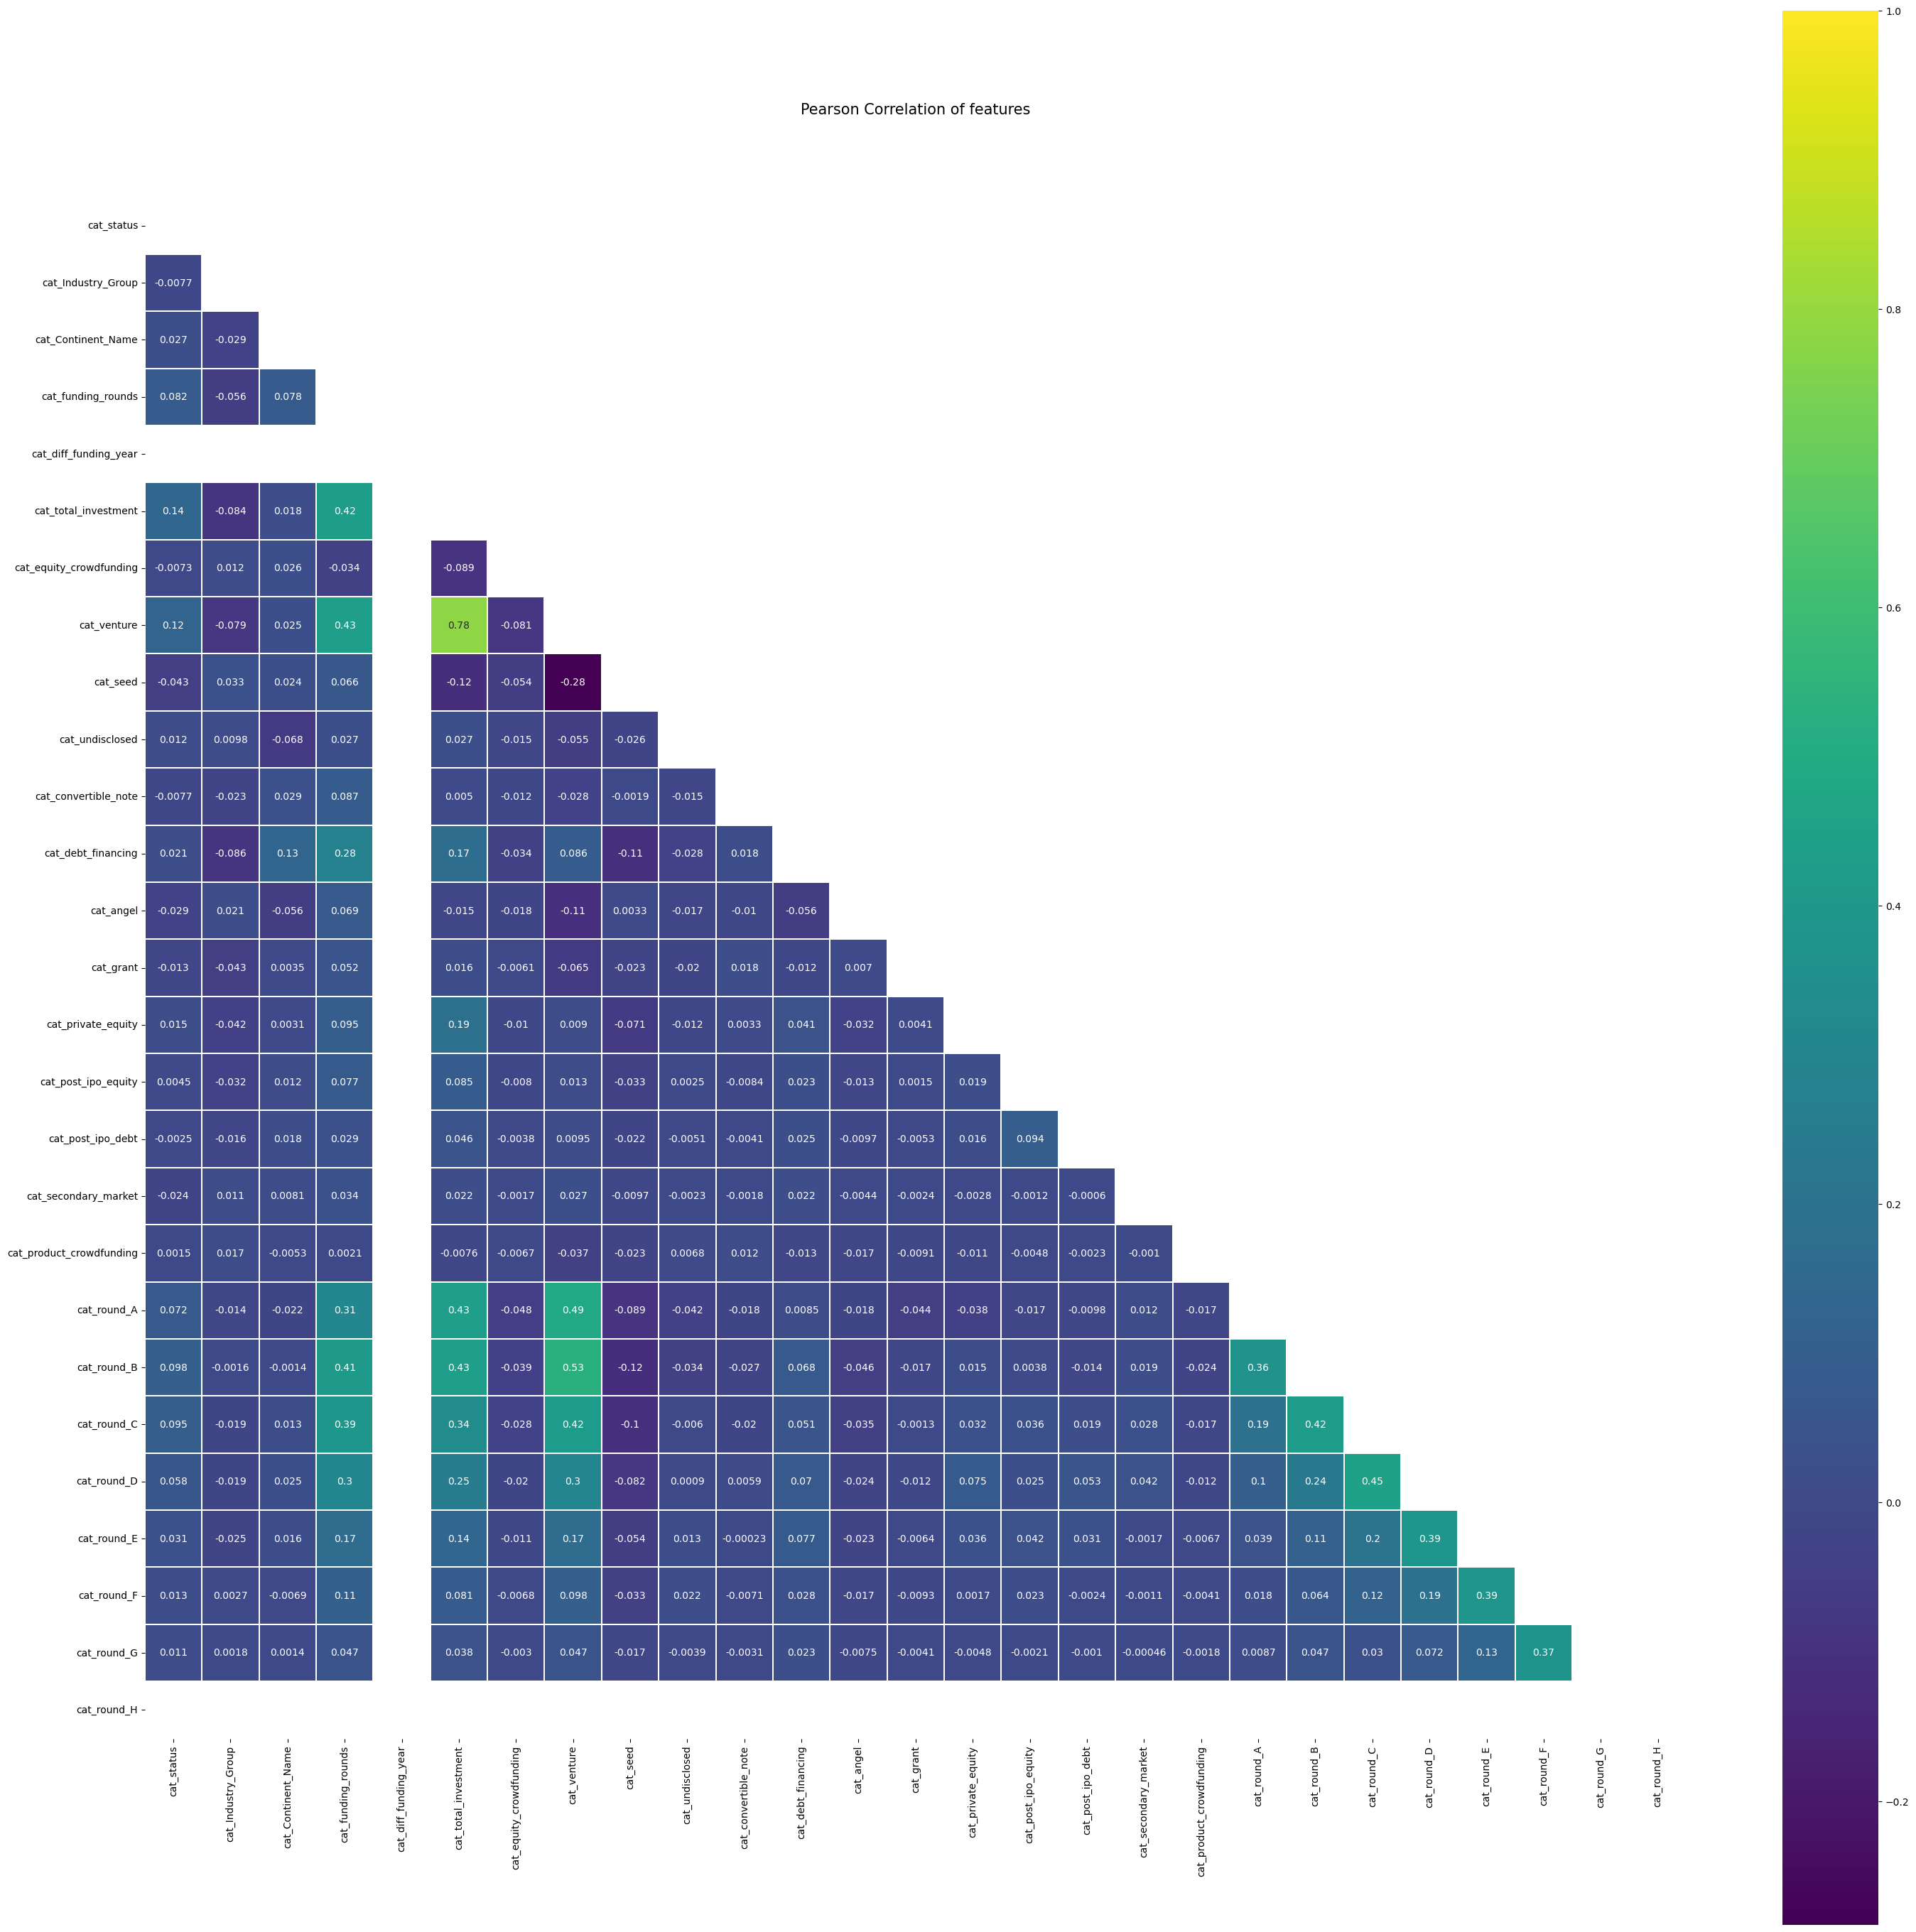

In [83]:
#creating correlation matrix
colormap = plt.cm.viridis
plt.figure(figsize = (35, 35))
plt.title('Pearson Correlation of features', y = 1.05, size = 15)
matrix = np.triu(df3.corr())
sns.heatmap(df3.astype(float).corr(), linewidth = 0.1, vmax = 1.0, square =True, cmap=colormap, linecolor = 'white', annot=True, mask = matrix)
plt.show()

In [84]:
df3.shape

(7497, 27)

In [85]:
df4 = df3[['cat_status', 'cat_Industry_Group', 'cat_Continent_Name',
       'cat_funding_rounds', 'cat_diff_funding_year', 'cat_total_investment', 'cat_venture', 'cat_seed', 'cat_debt_financing', 'cat_angel',
       'cat_private_equity', 'cat_round_A',
       'cat_round_B', 'cat_round_C', 'cat_round_D', 'cat_round_E',
       'cat_round_F']] # selecting the columns we need
       #you can use this dataset for the model. Created after excluding columns with less correlation

df4.shape # shape of dataset

(7497, 17)

In [86]:
df4.head()

,cat_status,cat_Industry_Group,cat_Continent_Name,cat_funding_rounds,cat_diff_funding_year,cat_total_investment,cat_venture,cat_seed,cat_debt_financing,cat_angel,cat_private_equity,cat_round_A,cat_round_B,cat_round_C,cat_round_D,cat_round_E,cat_round_F
0,1,37,3,0,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,37,1,1,NaN,3,3,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,25,3,1,NaN,2,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,41,3,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,29,3,0,NaN,3,3,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
# Making new datafram that removes the operating value
df5 = df3.copy()
df5.drop(df5.index[df5['cat_status'] == 1], inplace = True)
df5 = df5.replace({'cat_status':2},1) # only 0 and 1, 0 means closed and 1 means acquired

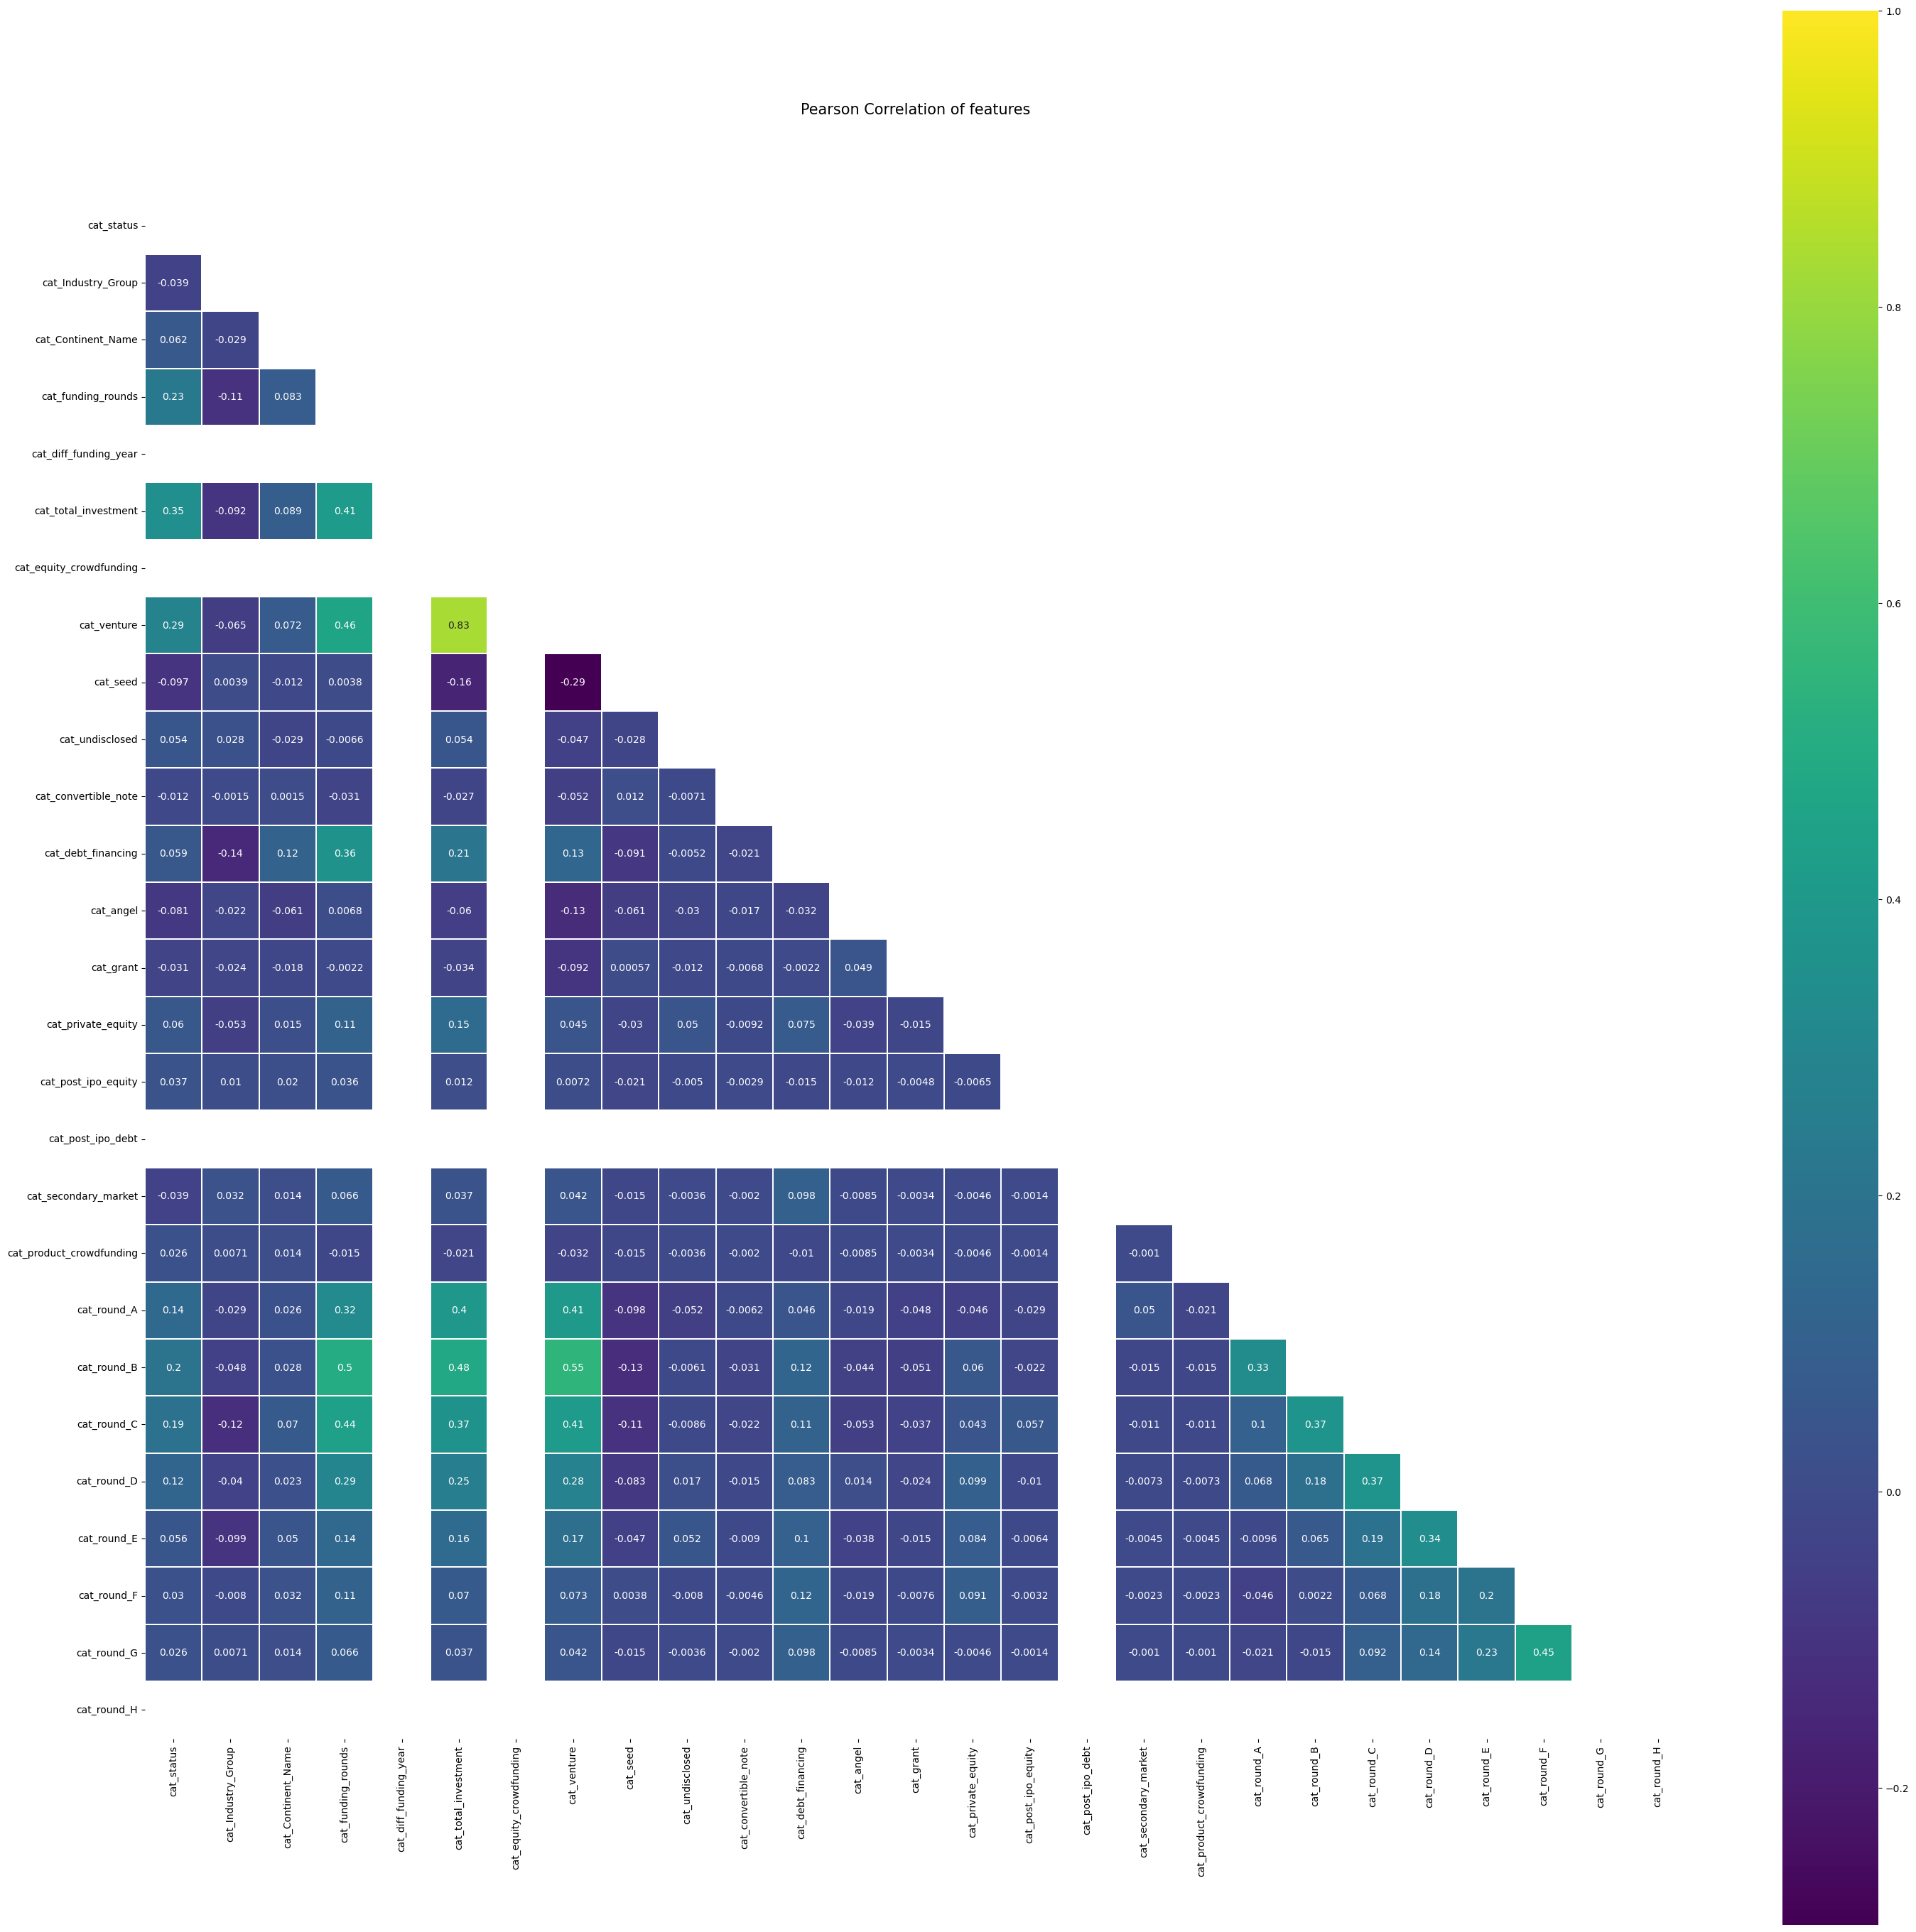

In [88]:
colormap = plt.cm.viridis
plt.figure(figsize = (35, 35))
plt.title('Pearson Correlation of features', y = 1.05, size = 15)
matrix = np.triu(df5.corr())
sns.heatmap(df5.astype(float).corr(), linewidth = 0.1, vmax = 1.0, square =True, cmap=colormap, linecolor = 'white', annot=True, mask = matrix)
plt.show()


In [89]:
df5 = df5[['cat_status', 'cat_Industry_Group', 'cat_Continent_Name',
       'cat_funding_rounds', 'cat_diff_funding_year', 'cat_total_investment', 'cat_venture', 'cat_seed', 'cat_debt_financing', 'cat_angel',
       'cat_private_equity', 'cat_round_A',
       'cat_round_B', 'cat_round_C', 'cat_round_D', 'cat_round_E',
       'cat_round_F']] # selecting the columns we need based on the correlation matrix

In [90]:
df5['cat_status'].count()

979

In [91]:
df5.shape 

(979, 17)

# models

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
Y = df4.cat_status #setting Y variable
X = df4.drop('cat_status', axis = 1) #dropping status and setting features
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)#test and train dataset

In [97]:
#checking size of each dataset
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',Y_train.shape)
print('Shape of Y_test=>',Y_test.shape)

Shape of X_train=> (5997, 16)
Shape of X_test=> (1500, 16)
Shape of Y_train=> (5997,)
Shape of Y_test=> (1500,)


In [98]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
from io import StringIO
from graphviz import Source

# Ensure df4 is the correct dataframe and it's loaded
# Y = df4['cat_status']  # Ensure the correct target column is used
# X = df4.drop('cat_status', axis=1)  # Dropping the target variable

In [99]:
# Initializing and training the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=100)

In [100]:
# Predictions
preds = clf.predict(X_test)

In [101]:
# Accuracy Scores
print("Test Accuracy:", accuracy_score(Y_test, preds))
print("Train Accuracy:", accuracy_score(Y_train, clf.predict(X_train)))

Test Accuracy: 0.8373333333333334
Train Accuracy: 0.8937802234450558


In [102]:
# Classification Report
print('\nClassification Report\n')
print(classification_report(Y_test, preds, target_names=['Closed', 'Operating', 'Acquired']))


Classification Report

              precision    recall  f1-score   support

      Closed       0.04      0.03      0.03        74
   Operating       0.89      0.94      0.91      1329
    Acquired       0.07      0.03      0.04        97

    accuracy                           0.84      1500
   macro avg       0.33      0.33      0.33      1500
weighted avg       0.79      0.84      0.81      1500



In [103]:
# Hyperparameter Tuning with GridSearchCV
param_dict = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(1, 20),  # Correct range for max_depth
    "min_samples_split": range(2, 20),  # Start from 2 for min_samples_split
    "min_samples_leaf": range(1, 10)
}

decision_tree = DecisionTreeClassifier(random_state=100)
grid = GridSearchCV(decision_tree, param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)

grid.fit(X_train, Y_train)

Fitting 10 folds for each of 6156 candidates, totalling 61560 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 20)},
             verbose=1)

In [104]:
# Best parameters
print("Best Parameters:", grid.best_params_)
best_clf = grid.best_estimator_

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [105]:
# Re-fit with best parameters
best_clf.fit(X_train, Y_train)
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

In [106]:
# New Accuracy Scores
print("New Train Accuracy:", accuracy_score(Y_train, y_train_pred))
print("New Test Accuracy:", accuracy_score(Y_test, y_test_pred))

New Train Accuracy: 0.8659329664832416
New Test Accuracy: 0.8866666666666667


In [107]:
# New Classification Report
print('\nNew Classification Report\n')
print(classification_report(Y_test, y_test_pred, target_names=['Closed', 'Operating', 'Acquired']))


New Classification Report

              precision    recall  f1-score   support

      Closed       0.00      0.00      0.00        74
   Operating       0.89      1.00      0.94      1329
    Acquired       0.67      0.02      0.04        97

    accuracy                           0.89      1500
   macro avg       0.52      0.34      0.33      1500
weighted avg       0.83      0.89      0.84      1500



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [108]:
# Visual representation of the model
xvar = X_train  # Use training data for feature names
feature_cols = xvar.columns
dot_data = StringIO()
export_graphviz(best_clf, out_file=dot_data, filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['Closed', 'Operating', 'Acquired'])

In [109]:
# Display the decision tree
graph = Source(dot_data.getvalue())
graph.format = 'png'
graph.render(filename='decision_tree', directory='./', cleanup=True)

'decision_tree.png'

In [110]:
# Feature importance
feat_importance = best_clf.feature_importances_
feat_imp = pd.DataFrame({'Feature': feature_cols, 'Importance': feat_importance})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)
print(feat_imp.head(6))  # Display top 6 features

                 Feature  Importance
0     cat_Industry_Group    0.371585
4   cat_total_investment    0.240306
1     cat_Continent_Name    0.145352
5            cat_venture    0.119282
12           cat_round_C    0.051727
10           cat_round_A    0.038249


In [111]:
# Creating sample DataFrame to test the model
sample_data = {
    'cat_Industry_Group': np.random.choice(range(0, 42), size=5),
    'cat_Continent_Name': np.random.choice(range(0, 5), size=5),
    'cat_funding_rounds': np.random.choice([0, 1], size=5),
    'cat_diff_funding_year': np.random.choice([0, 1], size=5),
    'cat_total_investment': np.random.choice([0, 1, 2, 3], size=5),
    'cat_venture': np.random.choice([0, 1, 2, 3], size=5),
    'cat_seed': np.random.choice([0, 1], size=5),
    'cat_debt_financing': np.random.choice([0, 1], size=5),
    'cat_angel': np.random.choice([0, 1], size=5),
    'cat_private_equity': np.random.choice([0, 1], size=5),
    'cat_round_A': np.random.choice([0, 1], size=5),
    'cat_round_B': np.random.choice([0, 1], size=5),
    'cat_round_C': np.random.choice([0, 1], size=5),
    'cat_round_D': np.random.choice([0, 1], size=5),
    'cat_round_E': np.random.choice([0, 1], size=5),
    'cat_round_F': np.random.choice([0, 1], size=5)
}
sample = pd.DataFrame(sample_data)

In [112]:
# Make predictions on the sample data
ynew = best_clf.predict(sample)
print("Sample Predictions:", ynew)

Sample Predictions: [1 1 1 1 1]


# Decision Tree: Binomial Classification

In [113]:
Y5 = df5.cat_status # need to be classified as this
X5 = df5.drop('cat_status', axis = 1) #dropping status and leaving only features
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X5, Y5, test_size = 0.2, random_state = 42)

In [114]:
#testing with small decision tree 
clf_pruned5 = DecisionTreeClassifier(criterion = "gini", random_state = 20,
                               max_depth=3, min_samples_leaf=5) # using depth of 3 for simplicity
clf_pruned5.fit(X_train5, Y_train5) # fitting the model

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=20)

In [115]:
preds_pruned5 = clf_pruned5.predict(X_test5)
preds_pruned_train5 = clf_pruned5.predict(X_train5)

print(accuracy_score(Y_test5, preds_pruned5)) # accuracy score of test dataset

print(accuracy_score(Y_train5, preds_pruned_train5))#accuracy score of train dataset
#accuracy score for train dataset is more than test so model might be overfitting

0.7091836734693877
0.6909323116219668


In [116]:
print('\nClassification Report\n') # Classification report
print(classification_report(Y_test5, preds_pruned5, target_names=['Class 0', 'Class 1']))


Classification Report

              precision    recall  f1-score   support

     Class 0       0.73      0.49      0.58        82
     Class 1       0.70      0.87      0.78       114

    accuracy                           0.71       196
   macro avg       0.71      0.68      0.68       196
weighted avg       0.71      0.71      0.70       196



In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_dict = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(1, 20),
    "min_samples_split": range(2, 20),  # Adjusted to start from 2
    "min_samples_leaf": range(1, 10)
}

decision_tree = DecisionTreeClassifier()

grid = GridSearchCV(decision_tree,
                    param_grid=param_dict,
                    cv=10,  # Cross-validation method
                    verbose=1,
                    n_jobs=-1)  # Use all processors

grid.fit(X_train5, Y_train5)  # Fit with your training data


Fitting 10 folds for each of 6156 candidates, totalling 61560 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 20)},
             verbose=1)

In [118]:
grid.best_params_ 
#best grid parameters

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [119]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=2)

In [120]:
#using parameter from grid to run model
clf_pruned5 = DecisionTreeClassifier(criterion = "gini", random_state = 20,
                               max_depth=3, min_samples_leaf=1, min_samples_split=2) 
clf_pruned5.fit(X_train5, Y_train5)

preds_pruned5 = clf_pruned5.predict(X_test5)
preds_pruned_train5 = clf_pruned5.predict(X_train5)
print(accuracy_score(Y_test5,preds_pruned5))#accuracy score
print(accuracy_score(Y_train5,preds_pruned_train5))# accuracy score

#classification report
print('\nClassification Report\n')
print(classification_report(Y_test5, preds_pruned5, target_names=['Class 0', 'Class 1']))

0.6989795918367347
0.6922094508301405

Classification Report

              precision    recall  f1-score   support

     Class 0       0.70      0.49      0.58        82
     Class 1       0.70      0.85      0.77       114

    accuracy                           0.70       196
   macro avg       0.70      0.67      0.67       196
weighted avg       0.70      0.70      0.69       196



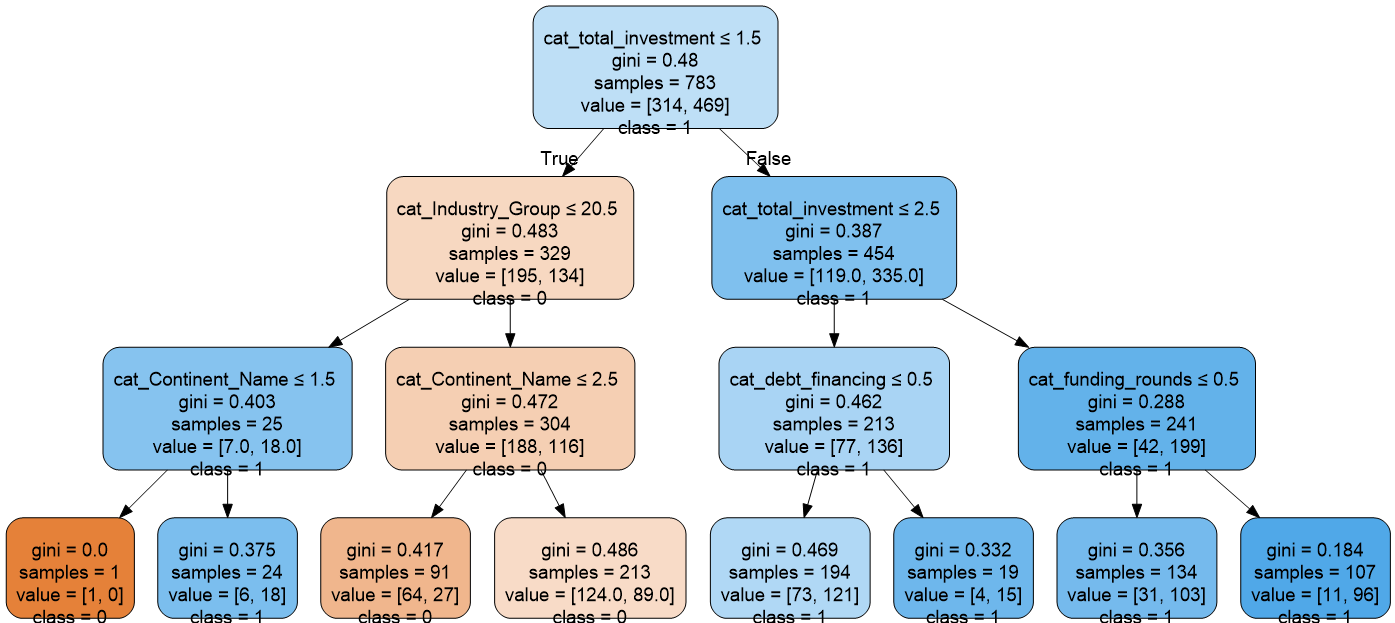

In [121]:
#visualizing the tree
xvar5 = df5.drop('cat_status', axis=1)
feature_cols5 = xvar5.columns
dot_data5 = StringIO()
export_graphviz(clf_pruned5, out_file=dot_data5,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols5,class_names=['0','1'])

(graph, ) = graph_from_dot_data(dot_data5.getvalue())
Image(graph.create_png())

In [122]:
#Calculating feature importance
feat_importance5 = clf_pruned5.tree_.compute_feature_importances(normalize=False)
feat_imp_dict5 = dict(zip(feature_cols5, clf_pruned5.feature_importances_))
feat_imp5 = pd.DataFrame.from_dict(feat_imp_dict5, orient='index')
feat_imp5.rename(columns = {0:'FeatureImportance'}, inplace = True)
feat_imp5.sort_values(by=['FeatureImportance'], ascending=False).head()#top 5 feature impacting decision tree split

,FeatureImportance
cat_total_investment,0.816405
cat_Industry_Group,0.087052
cat_Continent_Name,0.048554
cat_funding_rounds,0.032344
cat_debt_financing,0.015646


In [123]:
#creating sample data frame to test the model and predict
sample_data = {'cat_Industry_Group': np.random.choice(range(0,42,1), size = (5)),
        'cat_Continent_Name': np.random.choice(range(0,5,1), size = (5)),
        'cat_funding_rounds': np.random.choice([0,1], size = (5)),
        'cat_diff_funding_year': np.random.choice([0,1], size = (5)),
        'cat_total_investment': np.random.choice([0,1,2,3], size = (5)),
        'cat_venture': np.random.choice([0,1,2,3], size = (5)),
        'cat_seed': np.random.choice([0,1], size = (5)),
        'cat_debt_financing': np.random.choice([0,1], size = (5)),
        'cat_angel': np.random.choice([0,1], size = (5)),
        'cat_private_equity': np.random.choice([0,1], size = (5)),
        'cat_round_A': np.random.choice([0,1], size = (5)),
        'cat_round_B': np.random.choice([0,1], size = (5)),
        'cat_round_C': np.random.choice([0,1], size = (5)),
        'cat_round_D': np.random.choice([0,1], size = (5)),
        'cat_round_E': np.random.choice([0,1], size = (5)),
        'cat_round_F': np.random.choice([0,1], size = (5))
       }
sample = pd.DataFrame(sample_data, index=[0,1,2,3,4])
ynew = clf_pruned5.predict(sample)
ynew # predicting using decision tree binomial model

array([1, 0, 1, 1, 1], dtype=int64)

# Model: Random Forest

In [124]:
Y = df4.cat_status
X = df4.drop('cat_status', axis = 1) #setting features
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)# test and train dataset

In [125]:
rfc = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rfc.fit(X_train, Y_train)#training the model

RandomForestClassifier(n_estimators=1000, random_state=42)

In [126]:
rfc_pred_test = rfc.predict(X_test)
print(classification_report(Y_test, rfc_pred_test, target_names=['Class 1', 'Class 2', 'Class 3'])) # model is overfitting for class2 and bad at fitting 1 and 3

              precision    recall  f1-score   support

     Class 1       0.05      0.01      0.02        74
     Class 2       0.89      0.97      0.93      1329
     Class 3       0.15      0.04      0.06        97

    accuracy                           0.86      1500
   macro avg       0.36      0.34      0.34      1500
weighted avg       0.80      0.86      0.83      1500



In [127]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)
feature_list = list(X.columns)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: cat_Industry_Group   Importance: 0.43
Variable: cat_Continent_Name   Importance: 0.11
Variable: cat_total_investment Importance: 0.07
Variable: cat_funding_rounds   Importance: 0.05
Variable: cat_venture          Importance: 0.05
Variable: cat_debt_financing   Importance: 0.04
Variable: cat_round_A          Importance: 0.04
Variable: cat_seed             Importance: 0.03
Variable: cat_angel            Importance: 0.03
Variable: cat_round_B          Importance: 0.03
Variable: cat_round_C          Importance: 0.03
Variable: cat_private_equity   Importance: 0.02
Variable: cat_round_D          Importance: 0.02
Variable: cat_round_E          Importance: 0.02
Variable: cat_round_F          Importance: 0.01
Variable: cat_diff_funding_year Importance: 0.0


In [128]:
#Using Random Grid
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_dict = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(1, 20),
    "min_samples_split": range(2, 20),  # Ensure it's >= 2
    "min_samples_leaf": range(1, 10),
    "max_features": ['sqrt', 'log2', None]  # Correct options for max_features
}

decision_tree = DecisionTreeClassifier()

grid = GridSearchCV(decision_tree,
                    param_grid=param_dict,
                    cv=10,  # Cross-validation method
                    verbose=1,
                    n_jobs=-1)  # Use all processors

grid.fit(X_train5, Y_train5)  # Fit with your training data


Fitting 10 folds for each of 18468 candidates, totalling 184680 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 20)},
             verbose=1)

In [131]:
rfc = RandomForestClassifier(n_estimators = 1600, min_samples_split= 2, min_samples_leaf= 4, max_features= "sqrt", max_depth =10, bootstrap = True, random_state = 42)
rfc.fit(X_train, Y_train) 

rfc_pred_test = rfc.predict(X_test)
print(classification_report(Y_test, rfc_pred_test, target_names=['Class 1', 'Class 2', 'Class 3']))


              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00        74
     Class 2       0.89      1.00      0.94      1329
     Class 3       0.00      0.00      0.00        97

    accuracy                           0.89      1500
   macro avg       0.30      0.33      0.31      1500
weighted avg       0.78      0.89      0.83      1500



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [132]:
#creating sample data frame to test the model and predict
sample_data = {'cat_Industry_Group': np.random.choice(range(0,42,1), size = (5)),
        'cat_Continent_Name': np.random.choice(range(0,5,1), size = (5)),
        'cat_funding_rounds': np.random.choice([0,1], size = (5)),
        'cat_diff_funding_year': np.random.choice([0,1], size = (5)),
        'cat_total_investment': np.random.choice([0,1,2,3], size = (5)),
        'cat_venture': np.random.choice([0,1,2,3], size = (5)),
        'cat_seed': np.random.choice([0,1], size = (5)),
        'cat_debt_financing': np.random.choice([0,1], size = (5)),
        'cat_angel': np.random.choice([0,1], size = (5)),
        'cat_private_equity': np.random.choice([0,1], size = (5)),
        'cat_round_A': np.random.choice([0,1], size = (5)),
        'cat_round_B': np.random.choice([0,1], size = (5)),
        'cat_round_C': np.random.choice([0,1], size = (5)),
        'cat_round_D': np.random.choice([0,1], size = (5)),
        'cat_round_E': np.random.choice([0,1], size = (5)),
        'cat_round_F': np.random.choice([0,1], size = (5))
       }
sample = pd.DataFrame(sample_data, index=[0,1,2,3,4])
ynew = rfc.predict(sample)
ynew # 0 means close, 1 means operating and 2 means acquired

array([1, 1, 1, 1, 1], dtype=int64)

# Random Forest: Binomial Classification

In [133]:
Y5 = df5.cat_status# setting y variable
X5 = df5.drop('cat_status', axis = 1) # setting features
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X5, Y5, test_size = 0.2, random_state = 42) # test and train data

In [134]:
rfc5 = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rfc5.fit(X_train5, Y_train5) # using df5 and fitting the data

RandomForestClassifier(n_estimators=1000, random_state=42)

In [135]:
rfc_pred_test5 = rfc5.predict(X_test5) # predicting for test
print(classification_report(Y_test5, rfc_pred_test5, target_names=['Class 0', 'Class 1']))# classification report

              precision    recall  f1-score   support

     Class 0       0.59      0.44      0.50        82
     Class 1       0.66      0.78      0.71       114

    accuracy                           0.64       196
   macro avg       0.62      0.61      0.61       196
weighted avg       0.63      0.64      0.63       196



In [136]:
# Get numerical feature importances
importances = list(rfc5.feature_importances_)
feature_list = list(X5.columns)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: cat_Industry_Group   Importance: 0.33
Variable: cat_total_investment Importance: 0.17
Variable: cat_Continent_Name   Importance: 0.11
Variable: cat_venture          Importance: 0.08
Variable: cat_funding_rounds   Importance: 0.06
Variable: cat_seed             Importance: 0.04
Variable: cat_round_A          Importance: 0.04
Variable: cat_round_B          Importance: 0.04
Variable: cat_debt_financing   Importance: 0.03
Variable: cat_angel            Importance: 0.03
Variable: cat_round_C          Importance: 0.03
Variable: cat_round_D          Importance: 0.02
Variable: cat_private_equity   Importance: 0.01
Variable: cat_round_E          Importance: 0.01
Variable: cat_diff_funding_year Importance: 0.0
Variable: cat_round_F          Importance: 0.0


In [ ]:
#using the parameters from grid search to make the model
rfc5 = RandomForestClassifier(n_estimators = 200, min_samples_split= 5, min_samples_leaf= 4, max_features= "auto", max_depth =10, bootstrap = True, random_state = 42)
rfc5.fit(X_train5, Y_train5) 

rfc_pred_test5 = rfc5.predict(X_test5)
print(classification_report(Y_test5, rfc_pred_test5, target_names=['Class 0', 'Class 1']))

In [ ]:
#creating sample data frame to test the model and predict
sample_data = {'cat_Industry_Group': np.random.choice(range(0,42,1), size = (5)),
        'cat_Continent_Name': np.random.choice(range(0,5,1), size = (5)),
        'cat_funding_rounds': np.random.choice([0,1], size = (5)),
        'cat_diff_funding_year': np.random.choice([0,1], size = (5)),
        'cat_total_investment': np.random.choice([0,1,2,3], size = (5)),
        'cat_venture': np.random.choice([0,1,2,3], size = (5)),
        'cat_seed': np.random.choice([0,1], size = (5)),
        'cat_debt_financing': np.random.choice([0,1], size = (5)),
        'cat_angel': np.random.choice([0,1], size = (5)),
        'cat_private_equity': np.random.choice([0,1], size = (5)),
        'cat_round_A': np.random.choice([0,1], size = (5)),
        'cat_round_B': np.random.choice([0,1], size = (5)),
        'cat_round_C': np.random.choice([0,1], size = (5)),
        'cat_round_D': np.random.choice([0,1], size = (5)),
        'cat_round_E': np.random.choice([0,1], size = (5)),
        'cat_round_F': np.random.choice([0,1], size = (5))
       }
sample = pd.DataFrame(sample_data, index=[0,1,2,3,4])

In [ ]:
ynew = clf_pruned5.predict(sample)
ynew # predicting using decision tree binomial model. 0 means closed and 1 means acquired